In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# Above lines import essential data science libraries: NumPy for numerical operations, 
# pandas for data manipulation, seaborn and matplotlib for data visualization.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Import machine learning algorithms from scikit-learn. KNeighborsClassifier for KNN models,
# LogisticRegression for logistic regression models.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import performance metrics from scikit-learn to evaluate model accuracy, generate 
# classification reports, and create confusion matrices.

from wordcloud import WordCloud
# Import WordCloud for creating word cloud visualizations, often used to highlight 
# popular words or phrases in a dataset.

import matplotlib.pyplot as plt
# Duplicate import of matplotlib.pyplot, unnecessary as it's already imported above.

from collections import Counter
import string
import re
# Import Counter to count hashable objects, string for common string operations,
# and re for regular expressions to process text data.

import os
# Import os module to interact with the operating system, useful for file paths, 
# navigating directories, etc.

from textblob import TextBlob
# Import TextBlob, a library for processing textual data, useful for tasks like 
# sentiment analysis, part-of-speech tagging, and noun phrase extraction.

import plotly.graph_objs as go
import plotly.express as px
# Import Plotly for interactive plotting. Plotly Express for high-level interface for data visualization,
# and graph_objs (Graph Objects) for more control over plot elements.

from sklearn.preprocessing import StandardScaler
# Import StandardScaler from scikit-learn to standardize features by removing the mean 
# and scaling to unit variance, often a requirement for many machine learning estimators.

from sklearn.model_selection import train_test_split
# Import train_test_split to easily divide data into training and testing sets, which 
# is crucial for training and validating models effectively.

from sklearn.tree import DecisionTreeClassifier, plot_tree
# Import DecisionTreeClassifier for creating a decision tree model, useful for classification tasks.

from sklearn.metrics import classification_report, accuracy_score
# Duplicate import of classification_report and accuracy_score, unnecessary as they're already imported.

from sklearn.model_selection import GridSearchCV, train_test_split
# Import GridSearchCV for optimizing model parameters, a tool that allows you to define a grid of parameters
# that will be searched using K-fold cross-validation.

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go 
import plotly.express as px

In [2]:
# Read the CSV file using pandas into a data frame
# Use pandas' read_csv function to load the data from the specified file path.
# The 'encoding = 'latin-1'' parameter is used to ensure that any special characters in the data
# are correctly handled, which is useful if the default encoding (UTF-8) fails to read the file properly.
file_path = '/Users/sumadhurijd/Desktop/Project/Global_YouTube_Statistics_Project.csv'
df = pd.read_csv(file_path, encoding = 'latin-1')

# The .info() method on a DataFrame provides a concise summary of the DataFrame.

print("About the Dataset:")
print(df.info())

About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank               

In [3]:
# Use the describe() method to generate descriptive statistics that summarize the central tendency,
# dispersion, and shape of the dataset's numerical distributions, excluding NaN values.
df.describe()

rank   subscribers   video views        uploads  video_views_rank  \
count  995.00000  9.950000e+02  9.950000e+02     995.000000      9.940000e+02   
mean   498.00000  2.298241e+07  1.103954e+10    9187.125628      5.542489e+05   
std    287.37606  1.752611e+07  1.411084e+10   34151.352254      1.362782e+06   
min      1.00000  1.230000e+07  0.000000e+00       0.000000      1.000000e+00   
25%    249.50000  1.450000e+07  4.288145e+09     194.500000      3.230000e+02   
50%    498.00000  1.770000e+07  7.760820e+09     729.000000      9.155000e+02   
75%    746.50000  2.460000e+07  1.355470e+10    2667.500000      3.584500e+03   
max    995.00000  2.450000e+08  2.280000e+11  301308.000000      4.057944e+06   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count    879.000000         962.000000                      9.390000e+02   
mean     386.053470         745.719335                      1.756103e+08   
std     1232.244746        1944.386561                      4.163782e+08   
min        1.000000           1.000000                      1.000000e+00   
25%       11.000000          27.000000                      2.013750e+07   
50%       51.000000          65.500000                      6.408500e+07   
75%      123.000000         139.750000                      1.688265e+08   
max     7741.000000        7741.000000                      6.589000e+09   

       lowest_monthly_earnings  highest_monthly_earnings  ...  \
count               995.000000              9.950000e+02  ...   
mean              36886.148281              5.898078e+05  ...   
std               71858.724092              1.148622e+06  ...   
min                   0.000000              0.000000e+00  ...   
25%                2700.000000              4.350000e+04  ...   
50%               13300.000000              2.127000e+05  ...   
75%               37900.000000              6.068000e+05  ...   
max              850900.000000              1.360000e+07  ...   

       highest_yearly_earnings  subscribers_for_last_30_days  created_year  \
count             9.950000e+02                  6.580000e+02    990.000000   
mean              7.081814e+06                  3.490791e+05   2012.630303   
std               1.379704e+07                  6.143554e+05      4.512503   
min               0.000000e+00                  1.000000e+00   1970.000000   
25%               5.217500e+05                  1.000000e+05   2009.000000   
50%               2.600000e+06                  2.000000e+05   2013.000000   
75%               7.300000e+06                  4.000000e+05   2016.000000   
max               1.634000e+08                  8.000000e+06   2022.000000   

       created_date  Gross tertiary education enrollment (%)    Population  \
count    990.000000                               872.000000  8.720000e+02   
mean      15.746465                                63.627752  4.303873e+08   
std        8.777520                                26.106893  4.727947e+08   
min        1.000000                                 7.600000  2.025060e+05   
25%        8.000000                                36.300000  8.335541e+07   
50%       16.000000                                68.000000  3.282395e+08   
75%       23.000000                                88.200000  3.282395e+08   
max       31.000000                               113.100000  1.397715e+09   

       Unemployment rate  Urban_population    Latitude   Longitude  
count         872.000000      8.720000e+02  872.000000  872.000000  
mean            9.279278      2.242150e+08   26.632783  -14.128146  
std             4.888354      1.546874e+08   20.560533   84.760809  
min             0.750000      3.558800e+04  -38.416097 -172.104629  
25%             5.270000      5.590832e+07   20.593684  -95.712891  
50%             9.365000      2.706630e+08   37.090240  -51.925280  
75%            14.700000      2.706630e+08   37.090240   78.962880  
max            14.720000      8.429340e+08   61.92411

In [4]:
# The head() method is used to display the first five rows of the DataFrame.
df.head()

rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                     8000000.0   
3           US      Education  ...                     1000000.0   
4           IN  Entertainment  ...                     1000000.0   

   created_year  created_month  created_date  \
0        2006.0            Mar          13.0   
1        2006.0            Mar           5.0   
2        2012.0            Feb          20.0   
3        2006.0            Sep           1.0   
4        2006.0            Sep          20.0   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                     28.1  1.366418e+09               5.36   
1                                     88.2  3.282395e+08              14.70   
2                                     88.2  3.282395e+08              14.70   
3                                     88.2  3.282395e+08              14.70   
4                                     28.1  1.366418e+09               5.36   

   Urban_population   Latitude  Longitude  
0       471031528.0  20.593684  78.962880  
1       270663028.0  37.090240 -95.712891  
2       270663028.0  37.090240 -95.712891  
3       270663028.0  37.090240 -95.712891  
4       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

In [5]:
# The head() method is used to display the Last five rows of the DataFrame.
df.tail()

rank                  Youtuber  subscribers   video views  \
990   991             Natan por Aï¿     12300000  9.029610e+09   
991   992  Free Fire India Official     12300000  1.674410e+09   
992   993                     Panda     12300000  2.214684e+09   
993   994               RobTopGames     12300000  3.741235e+08   
994   995              Make Joke Of     12300000  2.129774e+09   

           category                     Title  uploads         Country  \
990          Sports             Natan por Aï¿     1200          Brazil   
991  People & Blogs  Free Fire India Official     1500           India   
992             NaN               HybridPanda     2452  United Kingdom   
993          Gaming               RobTopGames       39          Sweden   
994          Comedy              Make Joke Of       62           India   

    Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
990           BR  Entertainment  ...                      700000.0   
991           IN          Games  ...                      300000.0   
992           GB          Games  ...                        1000.0   
993           SE          Games  ...                      100000.0   
994           IN         Comedy  ...                      100000.0   

     created_year  created_month  created_date  \
990        2017.0            Feb          12.0   
991        2018.0            Sep          14.0   
992        2006.0            Sep          11.0   
993        2012.0            May           9.0   
994        2017.0            Aug           1.0   

     Gross tertiary education enrollment (%)    Population  Unemployment rate  \
990                                     51.3  2.125594e+08              12.08   
991                                     28.1  1.366418e+09               5.36   
992                                     60.0  6.683440e+07               3.85   
993                                     67.0  1.028545e+07               6.48   
994                                     28.1  1.366418e+09               5.36   

     Urban_population   Latitude  Longitude  
990       183241641.0 -14.235004 -51.925280  
991       471031528.0  20.593684  78.962880  
992        55908316.0  55.378051  -3.435973  
993         9021165.0  60.128161  18.643501  
994       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

# Data Cleaning & Preprocessing

In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month      

In [7]:
#cleaning columns in the dataset
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.title()
df.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
#Creating New data frame with desired(meaningful) attributes
youtube = df[['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category', 'Country', 'Abbreviation', 'Lowest Monthly Earnings', 'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']] #, 'Latitude', 'Longitude'
youtube.head(10)

Youtuber  Subscribers   Video Views  Uploads  \
0                    T-Series    245000000  2.280000e+11    20082   
1              YouTube Movies    170000000  0.000000e+00        1   
2                     MrBeast    166000000  2.836884e+10      741   
3  Cocomelon - Nursery Rhymes    162000000  1.640000e+11      966   
4                   SET India    159000000  1.480000e+11   116536   
5                       Music    119000000  0.000000e+00        0   
6         ýýý Kids Diana Show    112000000  9.324704e+10     1111   
7                   PewDiePie    111000000  2.905804e+10     4716   
8                 Like Nastya    106000000  9.047906e+10      493   
9               Vlad and Niki     98900000  7.718017e+10      574   

           Category        Country Abbreviation  Lowest Monthly Earnings  \
0             Music          India           IN                 564600.0   
1  Film & Animation  United States           US                      0.0   
2     Entertainment  United States           US                 337000.0   
3         Education  United States           US                 493800.0   
4             Shows          India           IN                 455900.0   
5               NaN            NaN          NaN                      0.0   
6    People & Blogs  United States           US                 182900.0   
7            Gaming          Japan           JP                   9800.0   
8    People & Blogs         Russia           RU                  12200.0   
9     Entertainment  United States           US                 145100.0   

   Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
0                9000000.00                                     28.1   
1                      0.05                                     88.2   
2                5400000.00                                     88.2   
3                7900000.00                                     88.2   
4                7300000.00                                     28.1   
5                      0.00                                      NaN   
6                2900000.00                                     88.2   
7                 156700.00                                     63.2   
8                 195800.00                                     81.9   
9                2300000.00                                     88.2   

   Unemployment Rate    Population  Urban Population  Created Year  
0               5.36  1.366418e+09       471031528.0        2006.0  
1              14.70  3.282395e+08       270663028.0        2006.0  
2              14.70  3.282395e+08       270663028.0        2012.0  
3              14.70  3.282395e+08       270663028.0        2006.0  
4               5.36  1.366418e+09       471031528.0        2006.0  
5                NaN           NaN               NaN        2013.0  
6              14.70  3.282395e+08       270663028.0        2015.0  
7               2.29  1.262266e+08       115782416.0        2010.0  
8               4.59  1.443735e+08       107683889.0        2016.0  
9              14.70  3.282395e+08       270663028.0        2018.0

In [9]:
#removing special characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

youtube['Youtuber'] = youtube['Youtuber'].apply(lambda x: re.sub(pattern, '', x))
youtube['Youtuber'] = youtube['Youtuber'].str.strip()
youtube['Youtuber'] = youtube['Youtuber'].str.lstrip('- ')

#checkimg for any special character in youtuber column
special_characters = youtube['Youtuber'].str.extractall(f'([{pattern}])').squeeze().unique()

if special_characters.size > 0:
    print("Youtuber's special characters:", special_characters)
else:
    print("No special characters found in Youtuber feature.")

No special characters found in Youtuber feature.


/var/folders/r2/f_69v6s931sgk1qmclph037c0000gn/T/ipykernel_69246/1530366892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube['Youtuber'] = youtube['Youtuber'].apply(lambda x: re.sub(pattern, '', x))
/var/folders/r2/f_69v6s931sgk1qmclph037c0000gn/T/ipykernel_69246/1530366892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube['Youtuber'] = youtube['Youtuber'].str.strip()
/var/folders/r2/f_69v6s931sgk1qmclph037c0000gn/T/ipykernel_69246/1530366892.py:6: SettingWithCopyWarning: 
A value is tr

In [10]:
youtube.head(5)

Youtuber  Subscribers   Video Views  Uploads  \
0                    T-Series    245000000  2.280000e+11    20082   
1              YouTube Movies    170000000  0.000000e+00        1   
2                     MrBeast    166000000  2.836884e+10      741   
3  Cocomelon - Nursery Rhymes    162000000  1.640000e+11      966   
4                   SET India    159000000  1.480000e+11   116536   

           Category        Country Abbreviation  Lowest Monthly Earnings  \
0             Music          India           IN                 564600.0   
1  Film & Animation  United States           US                      0.0   
2     Entertainment  United States           US                 337000.0   
3         Education  United States           US                 493800.0   
4             Shows          India           IN                 455900.0   

   Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
0                9000000.00                                     28.1   
1                      0.05                                     88.2   
2                5400000.00                                     88.2   
3                7900000.00                                     88.2   
4                7300000.00                                     28.1   

   Unemployment Rate    Population  Urban Population  Created Year  
0               5.36  1.366418e+09       471031528.0        2006.0  
1              14.70  3.282395e+08       270663028.0        2006.0  
2              14.70  3.282395e+08       270663028.0        2012.0  
3              14.70  3.282395e+08       270663028.0        2006.0  
4               5.36  1.366418e+09       471031528.0        2006.0

In [11]:
youtube.columns

Index(['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category',
       'Country', 'Abbreviation', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)',
       'Unemployment Rate', 'Population', 'Urban Population', 'Created Year'],
      dtype='object')

In [12]:
#This code removes rows with missing values in the 'Created Year' column, converts it to a string type for 
#categorical handling, and displays the updated DataFrame structure.

youtube = youtube.dropna(subset= ['Created Year'])
youtube['Created Year'] = youtube['Created Year'].astype('object')
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 990 non-null    object 
 1   Subscribers                              990 non-null    int64  
 2   Video Views                              990 non-null    float64
 3   Uploads                                  990 non-null    int64  
 4   Category                                 944 non-null    object 
 5   Country                                  870 non-null    object 
 6   Abbreviation                             870 non-null    object 
 7   Lowest Monthly Earnings                  990 non-null    float64
 8   Highest Monthly Earnings                 990 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  869 non-null    float64
 10  Unemployment Rate                        869 non-null  

In [13]:
# checkeing the range of Created Year in the data
youtube['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       1970.0, 2019.0, 2022.0], dtype=object)

In [14]:
#checking 1970 year which is unexpected
youtube[youtube['Created Year'] == 1970]

Youtuber  Subscribers   Video Views  Uploads         Category  \
101  YouTube     36300000  3.010785e+09      744  News & Politics   

           Country Abbreviation  Lowest Monthly Earnings  \
101  United States           US                   5300.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
101                   84400.0                                     88.2   

     Unemployment Rate   Population  Urban Population Created Year  
101               14.7  328239523.0       270663028.0       1970.0

In [15]:
#This code updates entries where the 'Youtuber' is 'YouTube' by replacing the 'Created Year' 
#value of 1970 with 2005, then displays the modified rows.

youtube[youtube['Youtuber'] == 'YouTube'] = youtube[youtube['Youtuber'] == 'YouTube'].replace(1970, 2005)
youtube[youtube['Youtuber'] == 'YouTube']

Youtuber  Subscribers   Video Views  Uploads         Category  \
101  YouTube     36300000  3.010785e+09      744  News & Politics   

           Country Abbreviation  Lowest Monthly Earnings  \
101  United States           US                   5300.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
101                   84400.0                                     88.2   

     Unemployment Rate   Population  Urban Population Created Year  
101               14.7  328239523.0       270663028.0         2005

In [16]:
#Check duplicate data
youtube.duplicated().sum()

0

In [17]:
#This code extracts and stores rows from the youtube DataFrame where the 'Video Views' 
#column equals 0 into a new DataFrame called zero_views.

zero_views = youtube[youtube['Video Views'] == 0]
zero_views

Youtuber  Subscribers  Video Views  Uploads          Category  \
1        YouTube Movies    170000000          0.0        1  Film & Animation   
5                 Music    119000000          0.0        0               NaN   
12               Gaming     93600000          0.0        0               NaN   
18               Sports     75000000          0.0        3               NaN   
102                News     36300000          0.0        0               NaN   
173  Popular on YouTube     29300000          0.0        3               NaN   
360   Minecraft - Topic     20900000          0.0        0               NaN   
592                Live     16100000          0.0        0               NaN   

           Country Abbreviation  Lowest Monthly Earnings  \
1    United States           US                      0.0   
5              NaN          NaN                      0.0   
12             NaN          NaN                      0.0   
18   United States           US                      0.0   
102            NaN          NaN                      0.0   
173            NaN          NaN                      0.0   
360            NaN          NaN                      0.0   
592            NaN          NaN                      0.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
1                        0.05                                     88.2   
5                        0.00                                      NaN   
12                       0.00                                      NaN   
18                       0.06                                     88.2   
102                      0.00                                      NaN   
173                      0.00                                      NaN   
360                      0.00                                      NaN   
592                      0.00                                      NaN   

     Unemployment Rate   Population  Urban Population Created Year  
1                 14.7  328239523.0       270663028.0       2006.0  
5                  NaN          NaN               NaN       2013.0  
12                 NaN          NaN               NaN       2013.0  
18                14.7  328239523.0       270663028.0       2006.0  
102                NaN          NaN               NaN       2013.0  
173                NaN          NaN               NaN       2017.0  
360                NaN          NaN               NaN       2013.0  
592                NaN          NaN               NaN       2015.0

In [18]:
#Removing rows with zero video views
youtube = youtube.drop(zero_views.index)
youtube.reset_index(drop= True, inplace= True)
youtube[youtube['Video Views'] == 0]

Empty DataFrame
Columns: [Youtuber, Subscribers, Video Views, Uploads, Category, Country, Abbreviation, Lowest Monthly Earnings, Highest Monthly Earnings, Gross Tertiary Education Enrollment (%), Unemployment Rate, Population, Urban Population, Created Year]
Index: []

In [19]:
#This line of code returns the dimensions of the youtube DataFrame, providing the number of rows 
#and columns it contains.

youtube.shape

(982, 14)

In [20]:
#Checking for any null data
youtube.isnull().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                    39
Country                                    114
Abbreviation                               114
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    115
Unemployment Rate                          115
Population                                 115
Urban Population                           115
Created Year                                 0
dtype: int64

In [21]:
#Replacing all null values in the categorical variables with 'Other'

categorical_variables = youtube.select_dtypes(include= 'O').columns
youtube[categorical_variables] = youtube[categorical_variables].fillna('Other')

#check missing value
youtube.isna().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                     0
Country                                      0
Abbreviation                                 0
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    115
Unemployment Rate                          115
Population                                 115
Urban Population                           115
Created Year                                 0
dtype: int64

In [22]:
#checking for blank data in youtuber column
blank_youtuber = youtube[youtube['Youtuber'] == '']
blank_youtuber

Youtuber  Subscribers   Video Views  Uploads          Category  \
60               43200000  3.645873e+10     1478  Film & Animation   
156              30400000  1.799996e+10      532             Other   
425              19000000  4.924054e+09       60         Education   
439              18800000  9.594189e+09      530     Entertainment   
551              16500000  2.440934e+09      421     Entertainment   
595              15900000  1.845330e+09        0    People & Blogs   
621              15500000  8.265130e+09     1021             Shows   
689              14900000  4.390980e+05        1    People & Blogs   
696              14800000  7.018015e+09     2387     Howto & Style   
703              14700000  2.230986e+09     1385     Entertainment   
740              14400000  6.001543e+08      364     Entertainment   
771              14100000  3.920221e+09       65     Entertainment   
782              14000000  7.719743e+09     2210            Gaming   
797              13900000  8.451755e+09      504             Other   
853              13300000  6.482687e+09      608    People & Blogs   
907              12900000  5.585085e+09     1255             Shows   

           Country Abbreviation  Lowest Monthly Earnings  \
60          Russia           RU                  75900.0   
156  United States           US                  30700.0   
425  United States           US                   5400.0   
439        Ukraine           UA                  17000.0   
551  United States           US                   5500.0   
595         Russia           RU                      0.0   
621   Saudi Arabia           SA                  33800.0   
689         Russia           RU                      2.0   
696        Ukraine           UA                  11800.0   
703   Saudi Arabia           SA                    673.0   
740    South Korea           KR                    342.0   
771          Other        Other                      5.0   
782         Russia           RU                  37600.0   
797  United States           US                  28600.0   
853         Russia           RU                  22600.0   
907        Ukraine           UA                  17800.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
60                  1200000.0                                     81.9   
156                  491700.0                                     88.2   
425                   86300.0                                     88.2   
439                  272000.0                                     82.7   
551                   87800.0                                     88.2   
595                       0.0                                     81.9   
621                  540100.0                                     68.0   
689                      31.0                                     81.9   
696                  188500.0                                     82.7   
703                   10800.0                                     68.0   
740                    5500.0                                     94.3   
771                      81.0                                      NaN   
782                  602300.0                                     81.9   
797                  457000.0                                     88.2   
853                  361000.0                                     81.9   
907                  284500.0                                     82.7   

     Unemployment Rate   Population  Urban Population  Created Year  
60                4.59  144373535.0       107683889.0        2011.0  
156              14.70  328239523.0       270663028.0        2018.0  
425              14.70  328239523.0       270663028.0        2018.0  
439               8.88   44385155.0        30835699.0        2014.0  
551              14.70  328239523.0       270663028.0        2014.0  
595               4.59  144373535.0       107683889.0        2017.0  
621               5.93   34268528.0        

In [23]:
#replacing blanlks with unknown
youtube['Youtuber'] = youtube['Youtuber'].replace('', pd.NA).fillna('unknown').where(youtube['Youtuber'].notna(), 'unknown' + (youtube['Youtuber'].isna().cumsum() - 1).astype(str))


In [24]:
#This code filters the youtube DataFrame to find and store rows where the 'Youtuber' 
#column has the value 'unknown' into a new DataFrame called Un_youtuber.
Un_youtuber = youtube[youtube['Youtuber'] == 'unknown']
Un_youtuber

Youtuber  Subscribers   Video Views  Uploads          Category  \
60   unknown     43200000  3.645873e+10     1478  Film & Animation   
156  unknown     30400000  1.799996e+10      532             Other   
425  unknown     19000000  4.924054e+09       60         Education   
439  unknown     18800000  9.594189e+09      530     Entertainment   
551  unknown     16500000  2.440934e+09      421     Entertainment   
595  unknown     15900000  1.845330e+09        0    People & Blogs   
621  unknown     15500000  8.265130e+09     1021             Shows   
689  unknown     14900000  4.390980e+05        1    People & Blogs   
696  unknown     14800000  7.018015e+09     2387     Howto & Style   
703  unknown     14700000  2.230986e+09     1385     Entertainment   
740  unknown     14400000  6.001543e+08      364     Entertainment   
771  unknown     14100000  3.920221e+09       65     Entertainment   
782  unknown     14000000  7.719743e+09     2210            Gaming   
797  unknown     13900000  8.451755e+09      504             Other   
853  unknown     13300000  6.482687e+09      608    People & Blogs   
907  unknown     12900000  5.585085e+09     1255             Shows   

           Country Abbreviation  Lowest Monthly Earnings  \
60          Russia           RU                  75900.0   
156  United States           US                  30700.0   
425  United States           US                   5400.0   
439        Ukraine           UA                  17000.0   
551  United States           US                   5500.0   
595         Russia           RU                      0.0   
621   Saudi Arabia           SA                  33800.0   
689         Russia           RU                      2.0   
696        Ukraine           UA                  11800.0   
703   Saudi Arabia           SA                    673.0   
740    South Korea           KR                    342.0   
771          Other        Other                      5.0   
782         Russia           RU                  37600.0   
797  United States           US                  28600.0   
853         Russia           RU                  22600.0   
907        Ukraine           UA                  17800.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
60                  1200000.0                                     81.9   
156                  491700.0                                     88.2   
425                   86300.0                                     88.2   
439                  272000.0                                     82.7   
551                   87800.0                                     88.2   
595                       0.0                                     81.9   
621                  540100.0                                     68.0   
689                      31.0                                     81.9   
696                  188500.0                                     82.7   
703                   10800.0                                     68.0   
740                    5500.0                                     94.3   
771                      81.0                                      NaN   
782                  602300.0                                     81.9   
797                  457000.0                                     88.2   
853                  361000.0                                     81.9   
907                  284500.0                                     82.7   

     Unemployment Rate   Population  Urban Population  Created Year  
60                4.59  144373535.0       107683889.0        2011.0  
156              14.70  328239523.0       270663028.0        2018.0  
425              14.70  328239523.0       270663028.0        2018.0  
439               8.88   44385155.0        30835699.0        2014.0  
551              14.70  328239523.0       270663028.0        2014.0  
595               4.59  144373535.0       107683889.0        2017.0  
621               5.93   34268528.0        

In [25]:
#Replacing all null numeric columns with the avg values
youtube_not_null = youtube.dropna(subset= ['Gross Tertiary Education Enrollment (%)','Unemployment Rate', 'Population', 'Urban Population'])

#Mean Education Enrollment
mean_edu = round(youtube_not_null['Gross Tertiary Education Enrollment (%)'].mean(),1)
print('Mean Gross Tertiary Education Enrollment:', mean_edu)

#Mean Unemployment Rate
mean_unemp = round(youtube_not_null['Unemployment Rate'].mean(),1)
print('Mean Unemployment Rate:', mean_unemp)

#Mean Population
mean_popu = round(youtube_not_null['Population'].mean(),0)
print('Mean Population:', mean_popu)

#Mean Urban Population
mean_urban = round(youtube_not_null['Urban Population'].mean(),0)
print('Mean Urban Population:', mean_urban)

Mean Gross Tertiary Education Enrollment: 63.5
Mean Unemployment Rate: 9.3
Mean Population: 431458653.0
Mean Urban Population: 224334935.0


In [26]:
#Replacing column missing values with Mean Values
youtube['Gross Tertiary Education Enrollment (%)'] = youtube['Gross Tertiary Education Enrollment (%)'].fillna(mean_edu)
youtube['Unemployment Rate'] = youtube['Unemployment Rate'].fillna(mean_unemp)
youtube['Population'] = youtube['Population'].fillna(mean_popu)
youtube['Urban Population'] = youtube['Urban Population'].fillna(mean_urban)
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   Subscribers                              982 non-null    int64  
 2   Video Views                              982 non-null    float64
 3   Uploads                                  982 non-null    int64  
 4   Category                                 982 non-null    object 
 5   Country                                  982 non-null    object 
 6   Abbreviation                             982 non-null    object 
 7   Lowest Monthly Earnings                  982 non-null    float64
 8   Highest Monthly Earnings                 982 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  982 non-null    float64
 10  Unemployment Rate                        982 non-n

In [27]:
# float data types columns to integars
youtube = youtube.astype({
    'Video Views': 'int64',
    'Created Year': 'int64',
    'Population': 'int64',
    'Urban Population': 'int64'
})

youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   Subscribers                              982 non-null    int64  
 2   Video Views                              982 non-null    int64  
 3   Uploads                                  982 non-null    int64  
 4   Category                                 982 non-null    object 
 5   Country                                  982 non-null    object 
 6   Abbreviation                             982 non-null    object 
 7   Lowest Monthly Earnings                  982 non-null    float64
 8   Highest Monthly Earnings                 982 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  982 non-null    float64
 10  Unemployment Rate                        982 non-n

In [28]:
# Sort the DataFrame by the values in the 'Subscribers' column in descending order
youtube = youtube.sort_values(by='Subscribers', ascending=False)

# Reset the index after sorting, dropping the previous index
youtube = youtube.reset_index(drop=True)

youtube

Youtuber  Subscribers   Video Views  Uploads  \
0                      T-Series    245000000  228000000000    20082   
1                       MrBeast    166000000   28368841870      741   
2    Cocomelon - Nursery Rhymes    162000000  164000000000      966   
3                     SET India    159000000  148000000000   116536   
4               Kids Diana Show    112000000   93247040539     1111   
..                          ...          ...           ...      ...   
977                 Natan por A     12300000    9029609749     1200   
978    Free Fire India Official     12300000    1674409945     1500   
979                       Panda     12300000    2214684303     2452   
980                 RobTopGames     12300000     374123483       39   
981                Make Joke Of     12300000    2129773714       62   

           Category         Country Abbreviation  Lowest Monthly Earnings  \
0             Music           India           IN                 564600.0   
1     Entertainment   United States           US                 337000.0   
2         Education   United States           US                 493800.0   
3             Shows           India           IN                 455900.0   
4    People & Blogs   United States           US                 182900.0   
..              ...             ...          ...                      ...   
977          Sports          Brazil           BR                 138100.0   
978  People & Blogs           India           IN                  16200.0   
979           Other  United Kingdom           GB                     17.0   
980          Gaming          Sweden           SE                    968.0   
981          Comedy           India           IN                   6000.0   

     Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
0                   9000000.0                                     28.1   
1                   5400000.0                                     88.2   
2                   7900000.0                                     88.2   
3                   7300000.0                                     28.1   
4                   2900000.0                                     88.2   
..                        ...                                      ...   
977                 2200000.0                                     51.3   
978                  258900.0                                     28.1   
979                     268.0                                     60.0   
980                   15500.0                                     67.0   
981                   96000.0                                     28.1   

     Unemployment Rate  Population  Urban Population  Created Year  
0                 5.36  1366417754         471031528          2006  
1                14.70   328239523         270663028          2012  
2                14.70   328239523         270663028          2006  
3                 5.36  1366417754         471031528          2006  
4                14.70   328239523         270663028          2015  
..                 ...         ...               ...           ...  
977              12.08   212559417         183241641          2017  
978               5.36  1366417754         471031528          2018  
979               3.85    66834405          55908316          2006  
980               6.48    10285453           9021165          2012  
981               5.36  1366417754         471031528          2017  

[982 rows x 14 columns]

In [29]:
youtube.to_csv('Global_Youtube_Statistics_2023_new.csv', index = False)

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)
youtube.info()

Current working directory: /Users/sumadhurijd
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 982 non-null    object 
 1   Subscribers                              982 non-null    int64  
 2   Video Views                              982 non-null    int64  
 3   Uploads                                  982 non-null    int64  
 4   Category                                 982 non-null    object 
 5   Country                                  982 non-null    object 
 6   Abbreviation                             982 non-null    object 
 7   Lowest Monthly Earnings                  982 non-null    float64
 8   Highest Monthly Earnings                 982 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  982 non-null    float64
 10  Unem

In [30]:
selected_columns = ['Youtuber', 'Subscribers']

# Filter the DataFrame for the top 10 Youtuber channels with the most subscribers
top_10_subscribers = youtube.nlargest(10, 'Subscribers')[selected_columns].copy()

# Convert 'Subscribers' to millions and rename the column
top_10_subscribers['Subscribers (million)'] = (top_10_subscribers['Subscribers'] / 1_000_000).astype(int)

# Drop the original 'Subscribers' column and reorder the DataFrame
top_10_subscribers = top_10_subscribers[['Youtuber', 'Subscribers (million)']]

# Display the DataFrame
print(top_10_subscribers)

                     Youtuber  Subscribers (million)
0                    T-Series                    245
1                     MrBeast                    166
2  Cocomelon - Nursery Rhymes                    162
3                   SET India                    159
4             Kids Diana Show                    112
5                   PewDiePie                    111
6                 Like Nastya                    106
7               Vlad and Niki                     98
8           Zee Music Company                     96
9                         WWE                     96


In [31]:
selected_columns = ['Youtuber', 'Video Views']

# Filter dataframe for top 10 channels with the most video views
top_10_video_views = youtube[selected_columns].sort_values(by='Video Views', ascending=False).head(10)

# Convert 'Video Views' to billions
top_10_video_views['Video Views (billion)'] = (top_10_video_views['Video Views'] / 1_000_000_000).astype(int)
top_10_video_views = top_10_video_views[['Youtuber', 'Video Views (billion)']].sort_values(by='Video Views (billion)', ascending=False).reset_index(drop=True)

# Show dataframe
print(top_10_video_views)

                     Youtuber  Video Views (billion)
0                    T-Series                    228
1  Cocomelon - Nursery Rhymes                    164
2                   SET India                    148
3                    Sony SAB                    101
4             Kids Diana Show                     93
5                 Like Nastya                     90
6                         WWE                     77
7               Vlad and Niki                     77
8                      Zee TV                     73
9                   Colors TV                     61


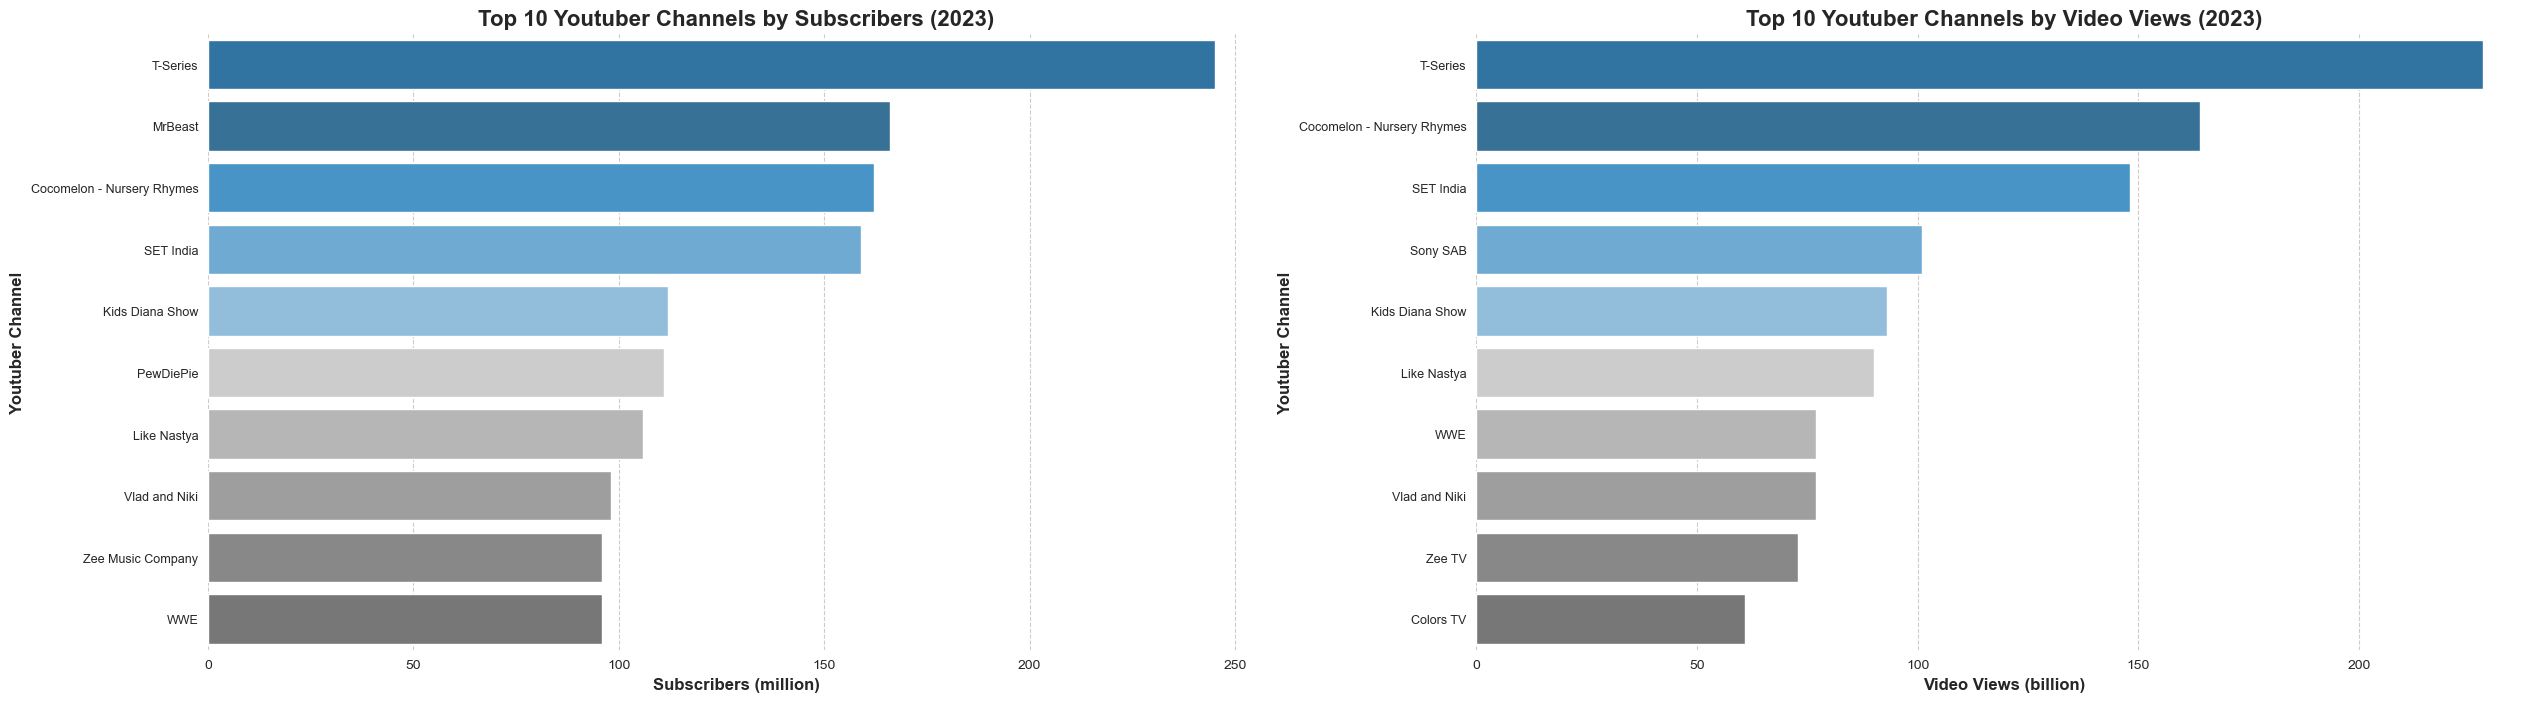

In [32]:
# Set Seaborn style to whitegrid for clear, grid-based plots
sb.set_style("whitegrid", {'axes.grid': True})

# Define a color palette for the bar charts
youtube_color_barchart_10 = ['#1f77b4', '#2874a6', '#3498db', '#5dade2', '#85c1e9', '#cccccc', '#b6b6b6', '#9e9e9e', '#888888', '#777777']

# Create a subplot environment with two plots side by side and specify their size
fig, ax = plt.subplots(1, 2, figsize=(30, 8))

# Bar plot for the top 10 YouTube channels by subscribers
sb.barplot(data=top_10_subscribers, x='Subscribers (million)', y='Youtuber', palette=youtube_color_barchart_10, ax=ax[0])
ax[0].set_title('Top 10 Youtuber Channels by Subscribers (2023)', fontweight='heavy', fontsize=16)
ax[0].set_xlabel('Subscribers (million)', fontweight='heavy', fontsize=12)
ax[0].set_ylabel('Youtuber Channel', fontweight='heavy', fontsize=12)
ax[0].grid(axis='x', linestyle='--')

# Remove unnecessary spines
for spine in ['top', 'right', 'bottom', 'left']:
    ax[0].spines[spine].set_visible(False)

# Set font size for y-axis tick labels
ax[0].tick_params(axis='y', labelsize=9)

# Bar plot for the top 10 YouTube channels by video views
sb.barplot(data=top_10_video_views, x='Video Views (billion)', y='Youtuber', palette=youtube_color_barchart_10, ax=ax[1])
ax[1].set_title('Top 10 Youtuber Channels by Video Views (2023)', fontweight='heavy', fontsize=16)
ax[1].set_xlabel('Video Views (billion)', fontweight='heavy', fontsize=12)
ax[1].set_ylabel('Youtuber Channel', fontweight='heavy', fontsize=12)
ax[1].grid(axis='x', linestyle='--')

# Remove unnecessary spines
for spine in ['top', 'right', 'bottom', 'left']:
    ax[1].spines[spine].set_visible(False)

# Set font size for y-axis tick labels
ax[1].tick_params(axis='y', labelsize=9)

# Display the plot
plt.show()


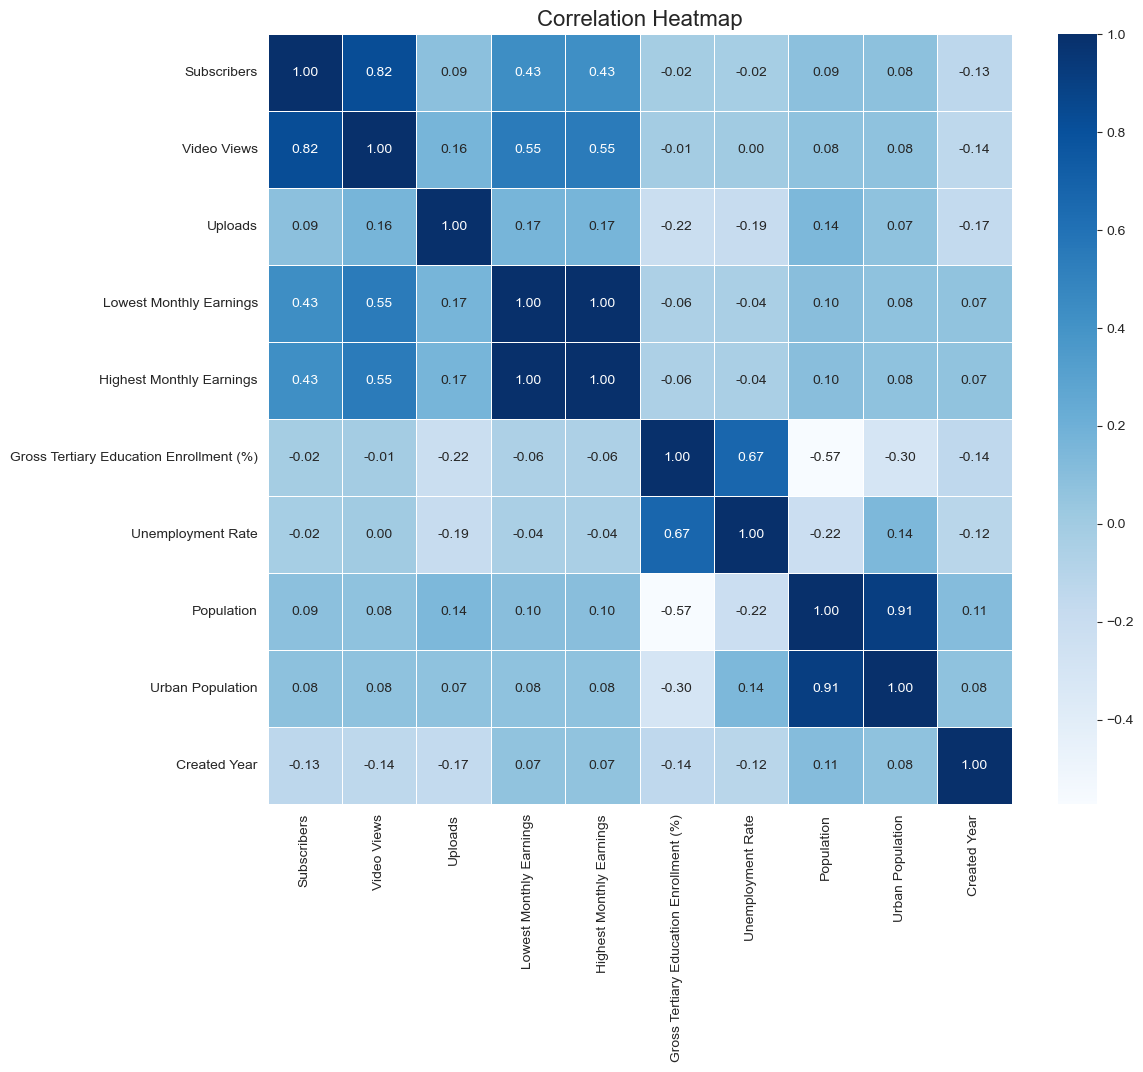

In [33]:
# Calculate the correlation matrix for selected columns in the YouTube DataFrame.
correlation = youtube[['Subscribers', 'Video Views', 'Uploads', 'Lowest Monthly Earnings', 
                       'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 
                       'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']].corr()

# Set up the matplotlib figure with specified size.
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize the correlation matrix, with annotations, color map set to 'Blues', 
# numerical formatting to two decimal places, and custom line widths between cells.
sb.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

# Add a title to the heatmap with a specified font size.
plt.title('Correlation Heatmap', fontsize=16)

# Display the plot.
plt.show()

In [34]:
# Define the columns from the DataFrame to use for analysis.
selected_columns = ['Youtuber', 'Subscribers', 'Video Views', 'Uploads']

# Create a new DataFrame using only the selected columns to focus on relevant data.
youtube_corr_statistics = youtube[selected_columns].copy()

# Convert the 'Subscribers' column from total counts to millions for a more digestible scale.
youtube_corr_statistics['Subscribers (million)'] = (youtube_corr_statistics['Subscribers'] / 1_000_000).astype(int)

# Convert the 'Video Views' column from total counts to billions to simplify large numbers.
youtube_corr_statistics['Video Views (billion)'] = (youtube_corr_statistics['Video Views'] / 1_000_000_000).astype(int)

# Convert the 'Uploads' column from total counts to thousands for easier comparison and visualization.
youtube_corr_statistics['Uploads (k.)'] = (youtube_corr_statistics['Uploads'] / 1_000).astype(int)

# Update the DataFrame to only include the columns with transformed scales.
youtube_corr_statistics = youtube_corr_statistics[['Youtuber', 'Subscribers (million)', 'Video Views (billion)', 'Uploads (k.)']]

# Display the first few rows of the updated DataFrame to verify the transformations.
print(youtube_corr_statistics.head())

                     Youtuber  Subscribers (million)  Video Views (billion)  \
0                    T-Series                    245                    228   
1                     MrBeast                    166                     28   
2  Cocomelon - Nursery Rhymes                    162                    164   
3                   SET India                    159                    148   
4             Kids Diana Show                    112                     93   

   Uploads (k.)  
0            20  
1             0  
2             0  
3           116  
4             1  


In [35]:
# Calculate the average number of video views in billions for the YouTube dataset.
# This provides an insight into the overall viewer engagement on the platform.
video_views_mean = youtube_corr_statistics['Video Views (billion)'].mean()
print("Average Video Views (billion):", video_views_mean)

# Calculate the average number of subscribers in millions for YouTube channels in the dataset.
# This statistic reflects the typical channel size in terms of audience.
subscribers_mean = youtube_corr_statistics['Subscribers (million)'].mean()
print("Average Subscribers (million):", subscribers_mean)


Average Video Views (billion): 10.65376782077393
Average Subscribers (million): 22.19246435845214


In [36]:
# Calculate the 95th percentile for the number of subscribers in millions. This statistical measure indicates that 95% of YouTube channels have subscribers less than this value.
per_subs = round(np.percentile(youtube_corr_statistics['Subscribers (million)'], 95))

# Calculate the 95th percentile for the number of video views in billions. Similar to the above, this value shows that 95% of YouTube channels have video views below this threshold.
per_views = round(np.percentile(youtube_corr_statistics['Video Views (billion)'], 95))

# Print the calculated 95th percentile values for both subscribers and video views, providing a clear benchmark for what constitutes the top 5% of YouTube channels in terms of these metrics.
print('95% of YouTube channels have subscribers below:', per_subs, 'million')
print('95% of YouTube channels have video views below:', per_views, 'billion')

95% of YouTube channels have subscribers below: 45 million
95% of YouTube channels have video views below: 28 billion


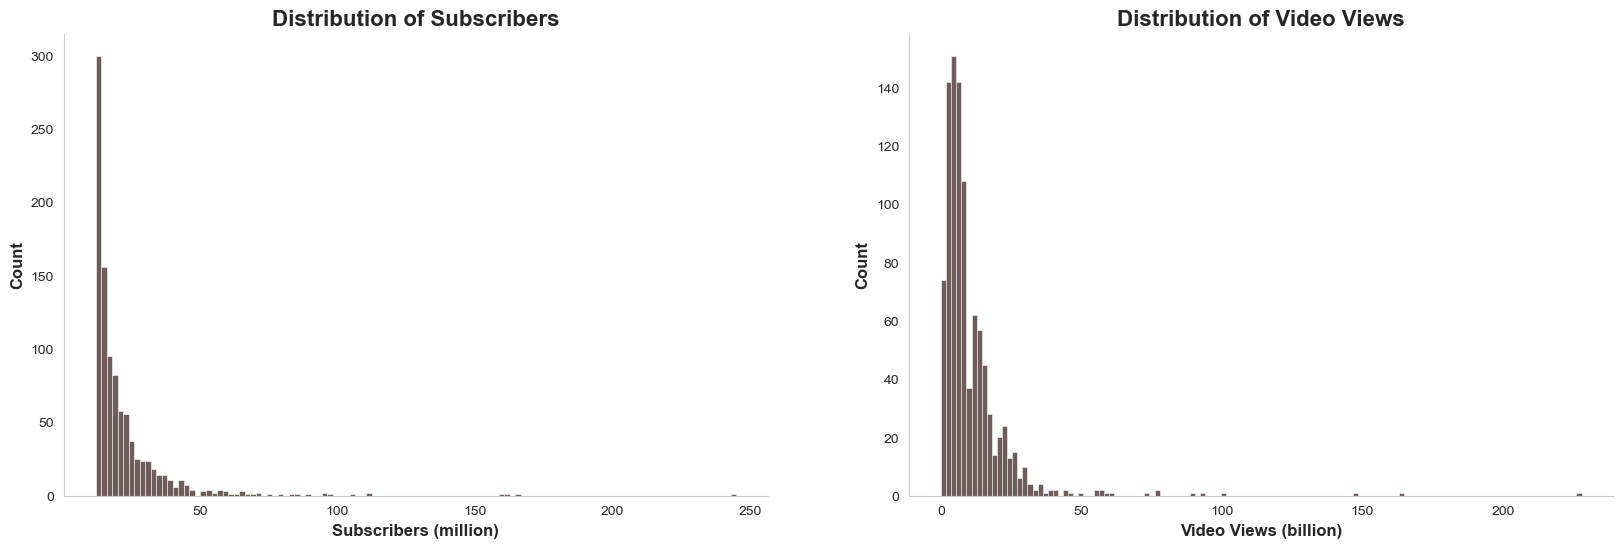

In [37]:
# Set the style of the plot to 'whitegrid'. The grid is set to be not visible, providing a clean, uncluttered background for the plots.
sb.set_style("whitegrid", {'axes.grid': False})

# Create a subplot layout of 1 row and 2 columns with a specified figure size.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot the distribution of 'Subscribers (million)' on the first subplot (ax1) using a histogram.
sb.histplot(youtube_corr_statistics['Subscribers (million)'], color='#3E2723', ax=ax1)
ax1.set_title('Distribution of Subscribers', fontweight='heavy', fontsize=16)  # Set the title of the first plot.
ax1.set_xlabel('Subscribers (million)', fontweight='heavy', fontsize=12)       # Set the x-axis label.
ax1.set_ylabel('Count', fontweight='heavy', fontsize=12)                       # Set the y-axis label.
# Customize the visibility of the plot spines for a more polished look.
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# Plot the distribution of 'Video Views (billion)' on the second subplot (ax2) using a histogram.
sb.histplot(youtube_corr_statistics['Video Views (billion)'], color='#3E2723', ax=ax2)
ax2.set_title('Distribution of Video Views', fontweight='heavy', fontsize=16)  # Set the title of the second plot.
ax2.set_xlabel('Video Views (billion)', fontweight='heavy', fontsize=12)       # Set the x-axis label.
ax2.set_ylabel('Count', fontweight='heavy', fontsize=12)                       # Set the y-axis label.
# Repeat the customization of the plot spines as done for the first plot.
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)

# Display the plot.
plt.show()

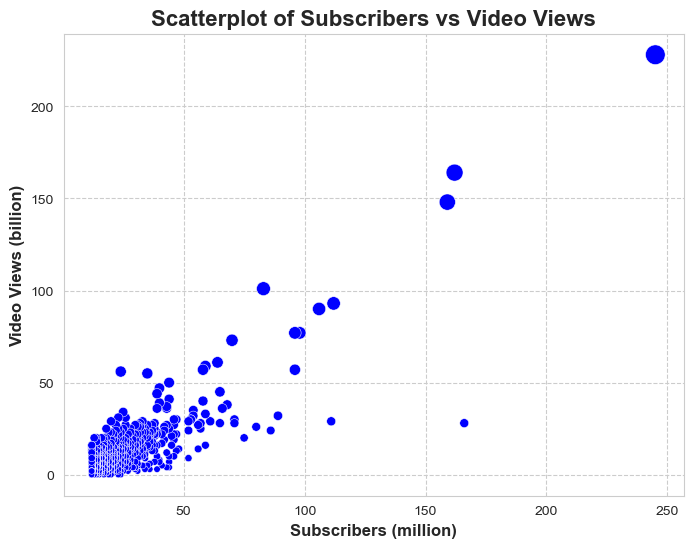

In [38]:

sb.set_style("whitegrid", {'axes.grid': True})

# Set scaling factor of circle size
scaling_factor = 2 

# Calculate the size of circles 
sizes = youtube_corr_statistics['Video Views (billion)'] * scaling_factor

# Create scatter plot
plt.figure(figsize=(8, 6))
sb.scatterplot(data=youtube_corr_statistics, x='Subscribers (million)', y='Video Views (billion)', 
               size=sizes, sizes=(20, 200), color='blue', legend=False)

# Add grid lines
plt.grid(True, linestyle='--')

# Set title and labels
plt.title('Scatterplot of Subscribers vs Video Views', fontweight='bold', fontsize=16)
plt.xlabel('Subscribers (million)', fontweight='bold', fontsize=12)
plt.ylabel('Video Views (billion)', fontweight='bold', fontsize=12)

# Show plot
plt.show()



In [39]:
# Extract and sort the top channels based on video views.
# This snippet selects specific columns related to channel performance, sorts them by 'Video Views' in descending order to get the channels with the most views at the top,
# resets the index for clean slicing, and retrieves only the top 10 entries for focused analysis.
top_upload_channels = youtube[['Youtuber', 'Category', 'Uploads', 'Video Views']] \
    .sort_values(by='Video Views', ascending=False) \
    .reset_index(drop=True) \
    .head(10)

# Display the DataFrame containing the top 10 channels with the highest video views.
top_upload_channels

Youtuber        Category  Uploads   Video Views
0                    T-Series           Music    20082  228000000000
1  Cocomelon - Nursery Rhymes       Education      966  164000000000
2                   SET India           Shows   116536  148000000000
3                    Sony SAB           Shows    71270  101000000000
4             Kids Diana Show  People & Blogs     1111   93247040539
5                 Like Nastya  People & Blogs      493   90479060027
6                         WWE          Sports    70127   77428473662
7               Vlad and Niki   Entertainment      574   77180169894
8                      Zee TV   Entertainment   129204   73139054467
9                   Colors TV           Shows   112915   61510906457

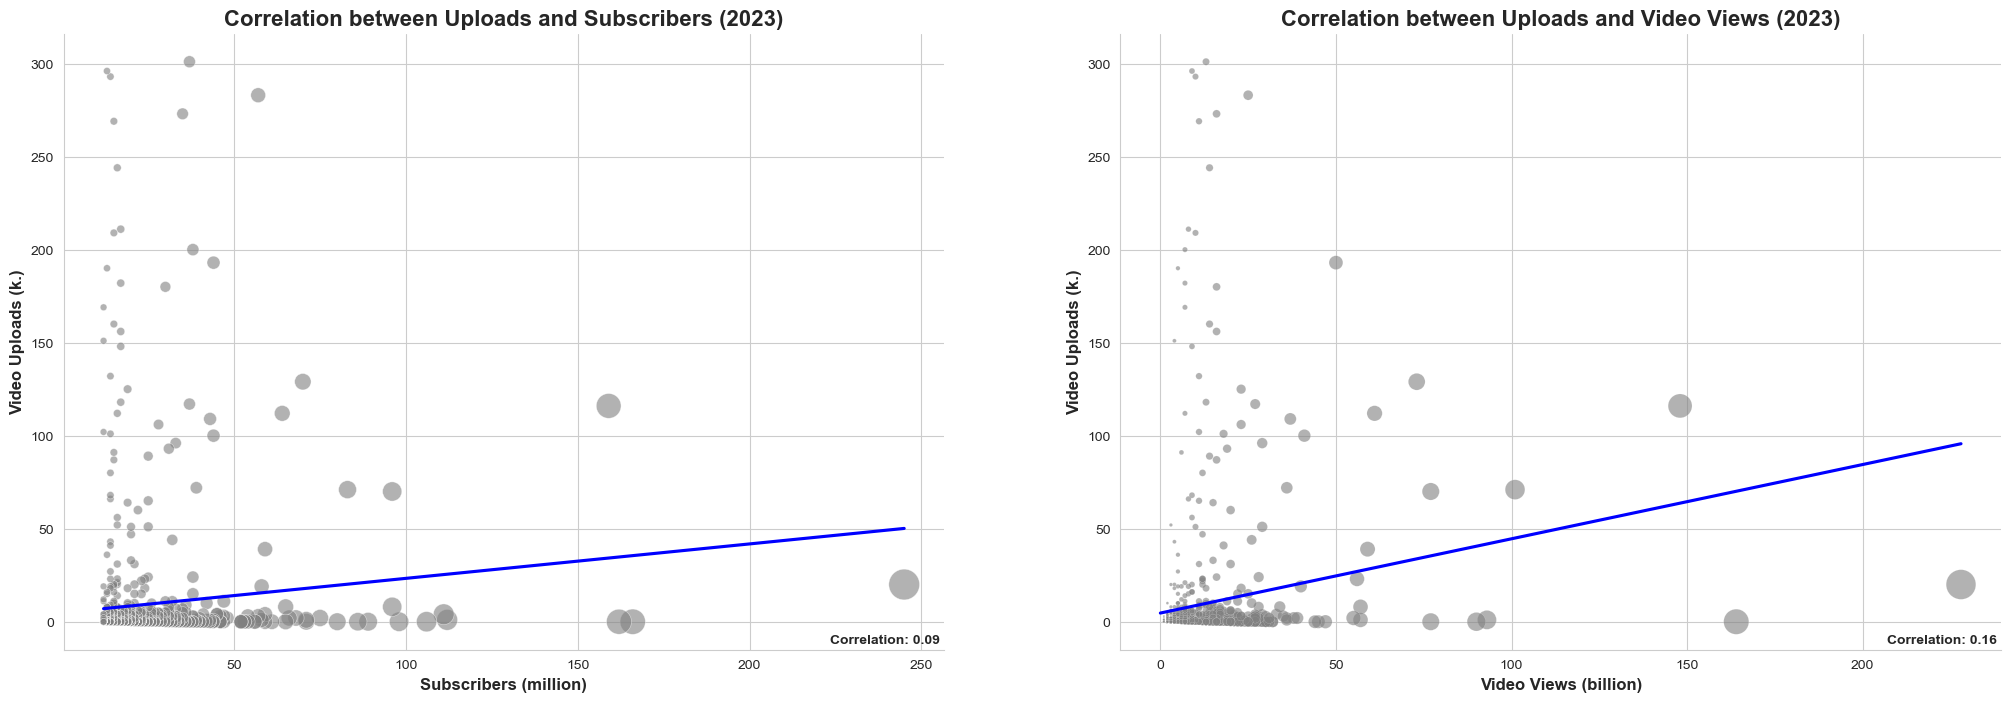

In [40]:
# Initialize a subplot with 1 row and 2 columns, setting the figure size to provide ample space for each plot.
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

# --- First subplot: Uploads vs. Subscribers ---
# Calculate the Pearson correlation coefficient for 'Uploads (k.)' and 'Subscribers (million)'.
correlation_ax0 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Subscribers (million)'])

# Define a scaling factor to adjust the size of the scatter plot markers based on subscribers.
scaling_factor_ax0 = 2  
sizes_ax0 = youtube_corr_statistics['Subscribers (million)'] * scaling_factor_ax0

# Create a scatter plot showing the relationship between 'Subscribers (million)' and 'Uploads (k.)'.
sb.scatterplot(data=youtube_corr_statistics, x='Subscribers (million)', y='Uploads (k.)', 
               color='gray', alpha=0.6, s=sizes_ax0, ax=ax[0])
sb.regplot(data=youtube_corr_statistics, x='Subscribers (million)', y='Uploads (k.)', 
           scatter=False, ci=None, line_kws={"color": "blue"}, ax=ax[0])
ax[0].set_title('Correlation between Uploads and Subscribers (2023)', fontweight='heavy', fontsize=16)
ax[0].set_xlabel('Subscribers (million)', fontweight='heavy', fontsize=12)
ax[0].set_ylabel('Video Uploads (k.)', fontweight='heavy', fontsize=12)
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)
ax[0].annotate(f'Correlation: {correlation_ax0:.2f}', xy=(0.87, 0.01), xycoords='axes fraction', fontsize=10, weight='bold')

# --- Second subplot: Uploads vs. Video Views ---
# Calculate the Pearson correlation coefficient for 'Uploads (k.)' and 'Video Views (billion)'.
correlation_ax1 = youtube_corr_statistics['Uploads (k.)'].corr(youtube_corr_statistics['Video Views (billion)'])

# Define a scaling factor to adjust the size of the scatter plot markers based on video views.
scaling_factor_ax1 = 2
sizes_ax1 = youtube_corr_statistics['Video Views (billion)'] * scaling_factor_ax1

# Create a scatter plot showing the relationship between 'Video Views (billion)' and 'Uploads (k.)'.
sb.scatterplot(data=youtube_corr_statistics, x='Video Views (billion)', y='Uploads (k.)', 
               color='gray', alpha=0.6, s=sizes_ax1, ax=ax[1])
sb.regplot(data=youtube_corr_statistics, x='Video Views (billion)', y='Uploads (k.)', 
           scatter=False, ci=None, line_kws={"color": "blue"}, ax=ax[1])
ax[1].set_title('Correlation between Uploads and Video Views (2023)', fontweight='heavy', fontsize=16)
ax[1].set_xlabel('Video Views (billion)', fontweight='heavy', fontsize=12)
ax[1].set_ylabel('Video Uploads (k.)', fontweight='heavy', fontsize=12)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].annotate(f'Correlation: {correlation_ax1:.2f}', xy=(0.87, 0.01), xycoords='axes fraction', fontsize=10, weight='bold')

# Display the combined plots.
plt.show()

In [41]:
# Group the YouTube data by 'Category' and aggregate specific statistics for each category.
# This provides a summarized view of total uploads, subscribers, and video views per category.
statis_category = youtube.groupby('Category').agg({
    'Category': 'count',  # Count the occurrences of each category to determine its frequency.
    'Uploads': 'sum',     # Sum all uploads for channels within each category.
    'Subscribers': 'sum', # Sum all subscribers for channels within each category.
    'Video Views': 'sum'  # Sum all video views for channels within each category.
}).rename(columns={'Category': 'Count of Category'}).reset_index()  # Rename the 'Category' column for clarity.

# Convert large numbers into more manageable units to make the data easier to read and understand.
statis_category['Video Views (billion)'] = (statis_category['Video Views'] / 1_000_000_000).astype(int)  # Convert 'Video Views' to billions.
statis_category['Subscribers (million)'] = (statis_category['Subscribers'] / 1_000_000).astype(int)      # Convert 'Subscribers' to millions.
statis_category['Uploads (k.)'] = (statis_category['Uploads'] / 1_000).astype(int)                      # Convert 'Uploads' to thousands.

# Select and reorder the columns to display the data in a more organized format.
statis_category = statis_category[['Category', 'Count of Category', 'Uploads (k.)', 'Subscribers (million)', 'Video Views (billion)']]

# Display the aggregated and formatted statistics table to provide insights into each category's YouTube presence.
statis_category

Category  Count of Category  Uploads (k.)  \
0        Autos & Vehicles                  2             3   
1                  Comedy                 69            77   
2               Education                 45           141   
3           Entertainment                240          2869   
4        Film & Animation                 45           128   
5                  Gaming                 93           405   
6           Howto & Style                 40            66   
7                  Movies                  2             7   
8                   Music                200           471   
9         News & Politics                 26          2924   
10  Nonprofits & Activism                  2           205   
11                  Other                 39            40   
12         People & Blogs                131          1213   
13         Pets & Animals                  4            17   
14   Science & Technology                 17            35   
15                  Shows                 13           356   
16                 Sports                 11           159   
17               Trailers                  2            13   
18        Travel & Events                  1             0   

    Subscribers (million)  Video Views (billion)  
0                      35                     15  
1                    1388                    550  
2                    1194                    696  
3                    5139                   2518  
4                    1144                    544  
5                    1942                    713  
6                     775                    201  
7                      51                     15  
8                    5155                   3103  
9                     536                    270  
10                     55                     10  
11                    713                    304  
12                   2765                   1260  
13                     72                     44  
14                    316                     66  
15                    541                    446  
16                    298                    147  
17                     78                     33  
18                     12                      3

In [42]:
# First, filter and retain only the 'Category' and 'Uploads (k.)' columns for a focused summary.
uploads_category = statis_category[['Category', 'Uploads (k.)']]

# For categories with uploads less than 300k, categorize them as 'Other' to simplify the analysis.
# This step combines smaller categories into a single 'Other' category for a cleaner and more meaningful display.
uploads_category.loc[uploads_category['Uploads (k.)'] < 300, 'Category'] = 'Other'

# After classifying smaller categories as 'Other', group by 'Category' again and sum up the uploads,
# ensuring all 'Other' category data is aggregated.
uploads_category = uploads_category.groupby('Category')['Uploads (k.)'].sum().reset_index()

# Sort the data by 'Uploads (k.)' in descending order to prioritize categories with more uploads.
uploads_category = uploads_category.sort_values(by='Uploads (k.)', ascending=False)

# Calculate the percentage of total uploads for each category.
# This provides a clearer understanding of each category's contribution to the total uploads.
total_uploads = uploads_category['Uploads (k.)'].sum()
uploads_category['Percent Uploads (%)'] = (uploads_category['Uploads (k.)'] / total_uploads * 100).round(0)

# Reset the index for the DataFrame to clean up the table view and prepare it for presentation or further analysis.
uploads_category.reset_index(drop=True, inplace=True)

# Display the finalized statistics table with categories sorted by their upload counts and percentages.
uploads_category

Category  Uploads (k.)  Percent Uploads (%)
0  News & Politics          2924                 32.0
1    Entertainment          2869                 31.0
2   People & Blogs          1213                 13.0
3            Other           891                 10.0
4            Music           471                  5.0
5           Gaming           405                  4.0
6            Shows           356                  4.0

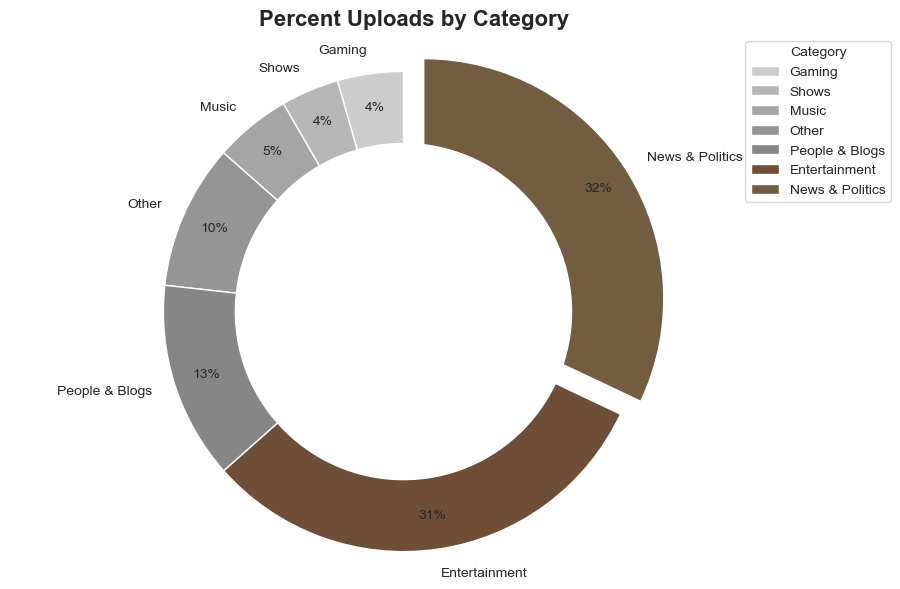

In [43]:
# Sort the 'uploads_category' DataFrame by 'Percent Uploads (%)' in ascending order for better visual hierarchy in the pie chart.
uploads_category = uploads_category.sort_values(by='Percent Uploads (%)', ascending=True)

# Define a color palette for the pie chart, varying shades of grey and brown for visual distinction.
youtube_color_donutchart = ['#CCCCCC', '#B6B6B6', '#A5A5A5', '#959595', '#868686', '#6F4E37', '#735D41', '#7C6C4A', '#897B55', '#968A60']

# Prepare labels and sizes for the pie chart from the sorted DataFrame.
labels = uploads_category['Category']
sizes = uploads_category['Uploads (k.)']

# Set explode to emphasize the category with the highest uploads.
# Note: Ensure the length of 'explode' matches the number of categories. Adjust or dynamically generate as needed.
explode = [0] * (len(labels) - 1) + [0.1]  # Explode the last item (largest) only.

# Set up the pie chart with the defined sizes, labels, and additional aesthetic settings.
plt.figure(figsize=(9, 6))
plt.pie(sizes, labels=labels,
        autopct='%1.0f%%',       # Show percentage in a simple format.
        startangle=90,           # Start the pie chart at 90 degrees to align the first section vertically.
        explode=explode,         # Apply the explode settings to pull the largest category slightly out of the center.
        colors=youtube_color_donutchart,  # Apply the custom color scheme.
        pctdistance=0.86)        # Position the percentage labels slightly closer to the center.

# Add a legend to the side of the plot, with a title and custom position outside the plot.
plt.legend(title='Category', bbox_to_anchor=(1.1, 1), labels=labels)

# Ensure the pie chart is drawn as a perfect circle.
plt.axis('equal')

# Add a title with a heavy font weight and adjusted font size.
plt.title('Percent Uploads by Category', fontweight='heavy', fontsize=16)

# Add a white circle at the center to turn the pie chart into a donut chart.
circle = plt.Circle(xy=(0, 0), radius=0.70, facecolor='white')
plt.gca().add_artist(circle)

# Display the plot with clean layout, adjusting for the legend if necessary.
plt.tight_layout()
plt.show()

In [44]:
# Select necessary columns and sort by 'Count of Category' in descending order to prioritize categories with more entries.
count_category = statis_category[['Category', 'Count of Category']].sort_values(by='Count of Category', ascending=False).reset_index(drop=True)

# Identify and consolidate smaller categories with fewer than 20 entries into a general 'Other' category to simplify the analysis.
# This step helps to manage and visualize categories with significant numbers more effectively.
count_category.loc[count_category['Count of Category'] < 20, 'Category'] = 'Other'

# After reassigning small categories to 'Other', re-group and sum the counts to aggregate all 'Other' category entries.
count_category = count_category.groupby('Category')['Count of Category'].sum().reset_index()

# Sort the data again in descending order to ensure the most populated categories are listed first.
count_category = count_category.sort_values(by='Count of Category', ascending=False)

# Reset the index of the DataFrame to have a clean and sequential index after sorting.
count_category.reset_index(drop=True, inplace=True)

# Display the final grouped and sorted DataFrame showing the count of entries per category.
# This display provides a clear view of category distribution and prominence on the platform.
count_category

Category  Count of Category
0     Entertainment                240
1             Music                200
2    People & Blogs                131
3            Gaming                 93
4             Other                 93
5            Comedy                 69
6         Education                 45
7  Film & Animation                 45
8     Howto & Style                 40
9   News & Politics                 26

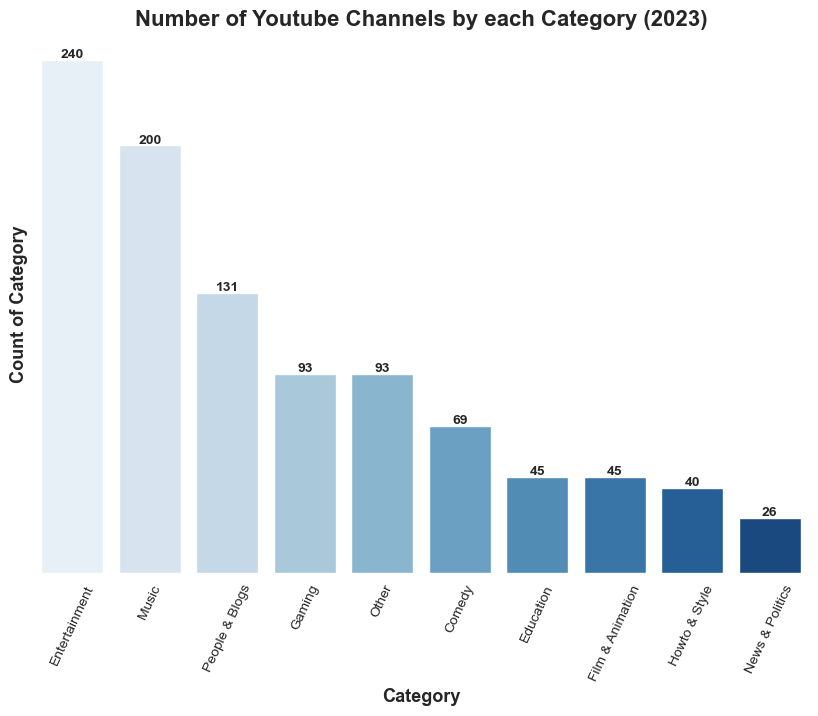

In [45]:
# Set the Seaborn plot style to 'whitegrid' with no grid lines for a cleaner look.
sb.set_style("whitegrid", {'axes.grid': False})

# Initialize the figure with a specified size for better visualization.
plt.figure(figsize=(10, 7))

# Extract the 'Count of Category' values into a list for easy access during plotting.
cnt_category = count_category['Count of Category'].tolist()

# Generate a color palette that varies shades of blue based on the number of categories.
blue_palette = sb.color_palette("Blues", len(count_category))

# Set the title with specified font size and weight.
plt.title('Number of Youtube Channels by each Category (2023)', fontsize=16, fontweight='heavy')

# Create a bar plot mapping 'Category' to the x-axis and 'Count of Category' to the y-axis, applying the blue color palette.
sb.barplot(data=count_category, x='Category', y='Count of Category', palette=blue_palette)

# Loop through the counts to place the text label on top of each bar, adding labels for better readability.
for i, value in enumerate(cnt_category):
    plt.text(i, value + 1, cnt_category[i], ha='center', fontsize=10, fontweight='heavy')

# Remove the left and bottom spines for a more modern look.
sb.despine(left=True, bottom=True)

# Add grid lines across the y-axis for easier evaluation of bar heights.
plt.grid(axis='y', linestyle='--')

# Customize the x and y-axis labels with specified font sizes and weights for clarity.
plt.xlabel('Category', fontsize=13, fontweight='heavy')
plt.ylabel('Count of Category', fontweight='heavy', fontsize=13)

# Rotate x-axis labels to prevent overlap and improve legibility.
plt.xticks(rotation=65)

# Remove y-axis ticks as the exact counts are displayed on the bars, making the ticks redundant.
plt.yticks([])

# Display the plot.
plt.show()

In [46]:
# Select specific columns related to Youtubers and their categories, subscribers, and video views.
sub_youtuber_cate = youtube[['Youtuber', 'Category', 'Subscribers', 'Video Views']]

# Sort the data by 'Subscribers' in descending order to find the channels with the most subscribers.
# This allows for identifying top performers in terms of subscriber count.
sub_youtuber_cate = sub_youtuber_cate.sort_values(by='Subscribers', ascending=False)

# Reset the index for the sorted DataFrame to clean up the index after sorting.
sub_youtuber_cate.reset_index(drop=True, inplace=True)

# Select the top 10 entries to focus on the highest subscriber counts among Youtubers.
sub_youtuber_cate = sub_youtuber_cate.head(10)

# Display the DataFrame containing information about the top 10 YouTube channels by subscriber count.
# This table provides insights into which channels are the most popular based on their subscriber numbers.
sub_youtuber_cate


Youtuber        Category  Subscribers   Video Views
0                    T-Series           Music    245000000  228000000000
1                     MrBeast   Entertainment    166000000   28368841870
2  Cocomelon - Nursery Rhymes       Education    162000000  164000000000
3                   SET India           Shows    159000000  148000000000
4             Kids Diana Show  People & Blogs    112000000   93247040539
5                   PewDiePie          Gaming    111000000   29058044447
6                 Like Nastya  People & Blogs    106000000   90479060027
7               Vlad and Niki   Entertainment     98900000   77180169894
8           Zee Music Company           Music     96700000   57856289381
9                         WWE          Sports     96000000   77428473662

In [47]:
# Select relevant columns from the YouTube DataFrame to focus on the Youtuber, their category, and video views.
view_youtuber_cate = youtube[['Youtuber', 'Category', 'Video Views']]

# Sort the DataFrame by 'Video Views' in descending order to identify the channels with the highest viewership.
view_youtuber_cate = view_youtuber_cate.sort_values(by='Video Views', ascending=False)

# Reset the index after sorting to maintain a clean and sequential order from 0 to n-1.
view_youtuber_cate.reset_index(drop=True, inplace=True)

# Limit the DataFrame to the top 10 rows, highlighting the channels with the most video views.
view_youtuber_cate = view_youtuber_cate.head(10)

# Display the resulting DataFrame which now contains the top 10 channels by video views,
# providing insight into which channels are most viewed on YouTube.
view_youtuber_cate


Youtuber        Category   Video Views
0                    T-Series           Music  228000000000
1  Cocomelon - Nursery Rhymes       Education  164000000000
2                   SET India           Shows  148000000000
3                    Sony SAB           Shows  101000000000
4             Kids Diana Show  People & Blogs   93247040539
5                 Like Nastya  People & Blogs   90479060027
6                         WWE          Sports   77428473662
7               Vlad and Niki   Entertainment   77180169894
8                      Zee TV   Entertainment   73139054467
9                   Colors TV           Shows   61510906457

In [48]:
# Select relevant columns for analysis, focusing on 'Category' and 'Subscribers (million)'.
subs_category = statis_category[['Category', 'Subscribers (million)']]

# Sort the data by 'Subscribers (million)' in descending order to rank categories by subscriber count.
subs_category = subs_category.sort_values(by='Subscribers (million)', ascending=False)

# Reset the index to ensure it is in sequential order after sorting.
subs_category.reset_index(drop=True, inplace=True)

# Calculate the percentage of total subscribers that each category represents.
# This adds context to the raw subscriber counts by showing their proportion relative to the total.
subs_category['Percent (%)'] = round((subs_category['Subscribers (million)'] / sum(subs_category['Subscribers (million)'])) * 100, 0)

# Display the DataFrame with the category, subscriber counts in millions, and their respective percentages.
# This structured display helps in quickly identifying which categories dominate in terms of subscriber base.
subs_category


Category  Subscribers (million)  Percent (%)
0                   Music                   5155         23.0
1           Entertainment                   5139         23.0
2          People & Blogs                   2765         12.0
3                  Gaming                   1942          9.0
4                  Comedy                   1388          6.0
5               Education                   1194          5.0
6        Film & Animation                   1144          5.0
7           Howto & Style                    775          3.0
8                   Other                    713          3.0
9                   Shows                    541          2.0
10        News & Politics                    536          2.0
11   Science & Technology                    316          1.0
12                 Sports                    298          1.0
13               Trailers                     78          0.0
14         Pets & Animals                     72          0.0
15  Nonprofits & Activism                     55          0.0
16                 Movies                     51          0.0
17       Autos & Vehicles                     35          0.0
18        Travel & Events                     12          0.0

In [49]:
# Select relevant columns 'Category' and 'Video Views (billion)' from the summarized statistics DataFrame.
views_category = statis_category[['Category', 'Video Views (billion)']]

# Sort the DataFrame by 'Video Views (billion)' in descending order to prioritize categories with the highest views.
views_category = views_category.sort_values(by='Video Views (billion)', ascending=False)

# Reset the index for the DataFrame to ensure it starts at 0 and is in sequential order after sorting.
views_category.reset_index(drop=True, inplace=True)

# Calculate the percentage of total video views each category accounts for, relative to the total views across all categories.
# This is done by dividing the video views of each category by the sum of video views from all categories, then multiplying by 100 and rounding off.
views_category['Percent (%)'] = round((views_category['Video Views (billion)'] / sum(views_category['Video Views (billion)'])) * 100, 0)

# Display the modified DataFrame with the video views and their corresponding percentages,
# providing insights into the relative popularity and viewership of each category.
views_category


Category  Video Views (billion)  Percent (%)
0                   Music                   3103         28.0
1           Entertainment                   2518         23.0
2          People & Blogs                   1260         12.0
3                  Gaming                    713          7.0
4               Education                    696          6.0
5                  Comedy                    550          5.0
6        Film & Animation                    544          5.0
7                   Shows                    446          4.0
8                   Other                    304          3.0
9         News & Politics                    270          2.0
10          Howto & Style                    201          2.0
11                 Sports                    147          1.0
12   Science & Technology                     66          1.0
13         Pets & Animals                     44          0.0
14               Trailers                     33          0.0
15       Autos & Vehicles                     15          0.0
16                 Movies                     15          0.0
17  Nonprofits & Activism                     10          0.0
18        Travel & Events                      3          0.0

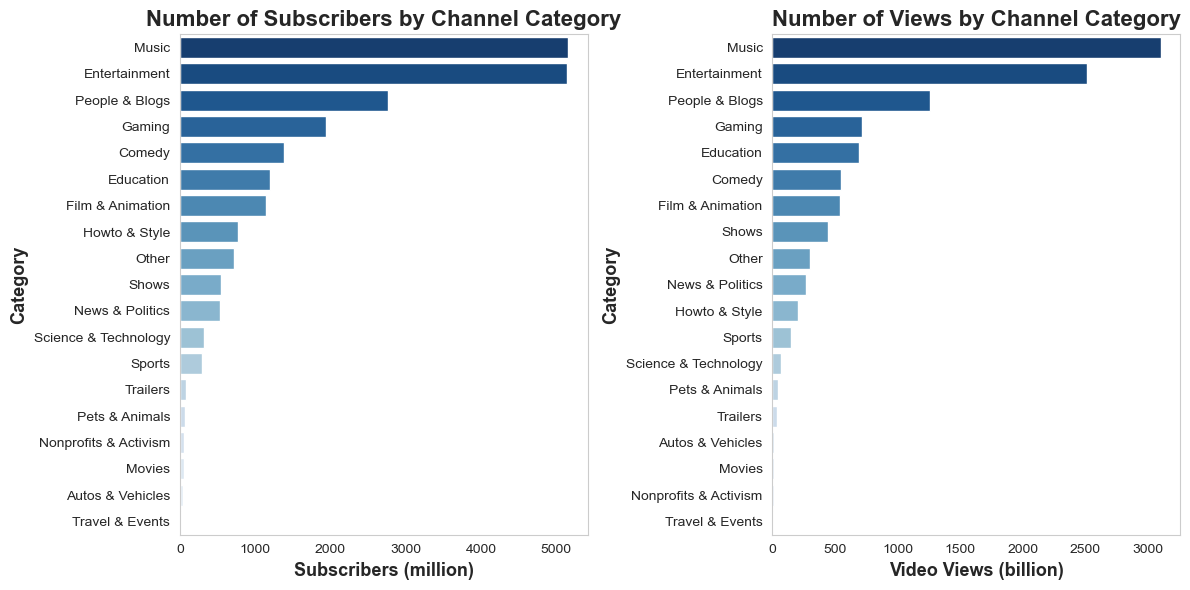

In [50]:
sb.set_style("whitegrid", {'axes.grid': False})

plt.figure(figsize=(12, 6))

blue_palette_subs = sb.color_palette("Blues_r", len(subs_category))
blue_palette_views = sb.color_palette("Blues_r", len(views_category))

# Plot the number of subscribers by channel category
plt.subplot(1, 2, 1)
sb.barplot(data=subs_category, x='Subscribers (million)', y='Category', palette=blue_palette_subs)
plt.title('Number of Subscribers by Channel Category', fontsize=16, fontweight='heavy')
plt.xlabel('Subscribers (million)', fontsize=13, fontweight='heavy')
plt.ylabel('Category', fontsize=13, fontweight='heavy')

# Plot the number of views by channel category
plt.subplot(1, 2, 2)
sb.barplot(data=views_category, x='Video Views (billion)', y='Category', palette=blue_palette_views)
plt.title('Number of Views by Channel Category', fontsize=16, fontweight='heavy')
plt.xlabel('Video Views (billion)', fontsize=13, fontweight='heavy')
plt.ylabel('Category', fontsize=13, fontweight='heavy')

plt.tight_layout()

plt.show()


In [51]:
# Group the YouTube data by 'Category' and calculate the sum of 'Subscribers' and 'Video Views' for each category.
# This aggregates the data needed to analyze the relationship between subscribers and video views.
subs_views_category = youtube.groupby('Category').agg({
    'Subscribers': 'sum',
    'Video Views': 'sum'
})

# Calculate the View-to-Subscriber Ratio for each category. This ratio is obtained by dividing the total video views by the total subscribers.
# The result is cast to an integer for simplicity and readability.
subs_views_category['View-to-Subscriber Ratio'] = (subs_views_category['Video Views'] / subs_views_category['Subscribers']).astype('int')

# Sort the DataFrame by the 'View-to-Subscriber Ratio' in descending order to highlight categories with the highest ratios,
# indicating categories where views significantly outnumber subscribers.
subs_views_category.sort_values(by='View-to-Subscriber Ratio', ascending=False, inplace=True)

# Reset the index to clean up the DataFrame's appearance, making the category names accessible as a column rather than just an index.
subs_views_category.reset_index(inplace=True)

# Display the DataFrame that now includes each category alongside its total subscribers, total video views, and the calculated view-to-subscriber ratio.
# This provides a clear view of which categories engage viewers most relative to their subscriber base.
subs_views_category


Category  Subscribers    Video Views  \
0                   Shows    541000000   446206826909   
1          Pets & Animals     72400000    44866745899   
2                   Music   5155300000  3103516219048   
3               Education   1194400000   696614472899   
4         News & Politics    536400000   270391919347   
5                  Sports    298200000   147986290620   
6           Entertainment   5139900000  2518941264905   
7        Film & Animation   1144900000   544422509313   
8          People & Blogs   2765000000  1260101977096   
9                   Other    713700000   304643391631   
10               Trailers     78000000    33262717607   
11       Autos & Vehicles     35700000    15003458141   
12                 Comedy   1388500000   550112774315   
13                 Gaming   1942500000   713886552367   
14                 Movies     51300000    15383255129   
15          Howto & Style    775600000   201817545540   
16        Travel & Events     12500000     3140883140   
17   Science & Technology    316500000    66976747110   
18  Nonprofits & Activism     55500000    10862911785   

    View-to-Subscriber Ratio  
0                        824  
1                        619  
2                        602  
3                        583  
4                        504  
5                        496  
6                        490  
7                        475  
8                        455  
9                        426  
10                       426  
11                       420  
12                       396  
13                       367  
14                       299  
15                       260  
16                       251  
17                       211  
18                       195

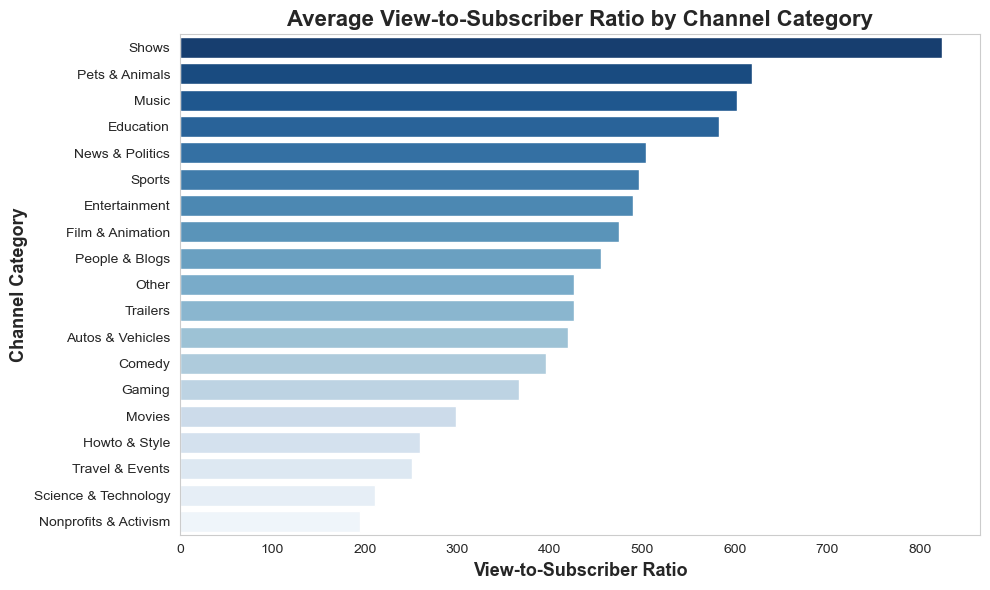

In [52]:
sb.set_style("whitegrid", {'axes.grid': False})

plt.figure(figsize=(10, 6))
sb.barplot(data=subs_views_category, y='Category', x='View-to-Subscriber Ratio', palette='Blues_r')
plt.title('Average View-to-Subscriber Ratio by Channel Category', fontsize=16, fontweight='bold')
plt.xlabel('View-to-Subscriber Ratio', fontsize=13, fontweight='bold')
plt.ylabel('Channel Category', fontsize=13, fontweight='bold')
plt.tight_layout()

plt.show()




In [53]:
# Group the YouTube data by 'Country' and 'Abbreviation', count the number of Youtubers in each country,
# and rename the aggregated column for clarity.
map_chart = youtube.groupby(['Country', 'Abbreviation'])[['Youtuber']].count().reset_index().rename(columns={'Youtuber': 'Count of Country'})

# Sort the results by 'Count of Country' in descending order to prioritize countries with the most channels.
map_chart.sort_values(by='Count of Country', ascending=False, inplace=True)

# Reset the index of the DataFrame after sorting to ensure a clean and sequential index.
map_chart.reset_index(drop=True, inplace=True)

# Calculate the percentage of total channels each country represents, rounding to one decimal place.
map_chart['Percent'] = round((map_chart['Count of Country'] / sum(map_chart['Count of Country'])) * 100, 1)

# Define a custom color scale for the choropleth map, assigning specific colors based on data values.
custom_colorscale = [
    [0, "#115f9a"],  # Dark blue for lowest values
    [0.05, "#1984c5"],  # Lighter blue
    [0.1, "#22a7f0"],  # Sky blue
    [0.2, "#48b5c4"],  # Cyan
    [0.4, "#76c68f"],  # Green
    [0.6, "#a6d75b"],  # Lime green
    [0.7, "#c9e52f"],  # Yellow-green
    [0.8, "#d0ee11"],  # Yellow
    [1, "#f4f100"]    # Bright yellow
]

# Create a choropleth map using Plotly, specifying the country locations, color scale, and other display properties.
fig = px.choropleth(
    map_chart, 
    locations='Country',  # Specifies the data column for country locations
    locationmode='country names',  # Uses country names for mapping
    color='Count of Country',  # Data column for coloring the map
    color_continuous_scale=custom_colorscale,  # Apply the custom color scale
    hover_name='Country',  # Hover tooltip will show country names
    title='Distribution of Channels per Country',  # Title of the map
    projection='equirectangular'  # Map projection style
)

# Update color axis settings for the colorbar title.
fig.update_coloraxes(colorbar_title='Count of Country')

# Update layout settings to enhance the map's appearance.
fig.update_layout(
    title=dict(text="Distribution of Channels per Country", x=0.3),  # Centralized title with custom position
    title_font=dict(size=18),  # Title font size
    height=630,  # Height of the figure
    width=1100,  # Width of the figure
    geo=dict(
        showcoastlines=True,  # Show coastlines
        coastlinecolor="Black",  # Coastline color
        showland=True,  # Show land
        landcolor="LightGray",  # Land color
        showocean=True,  # Show ocean
        oceancolor="LightBlue"  # Ocean color
    )
)

# Display the plot.
fig.show()

<Figure size 1200x800 with 0 Axes>

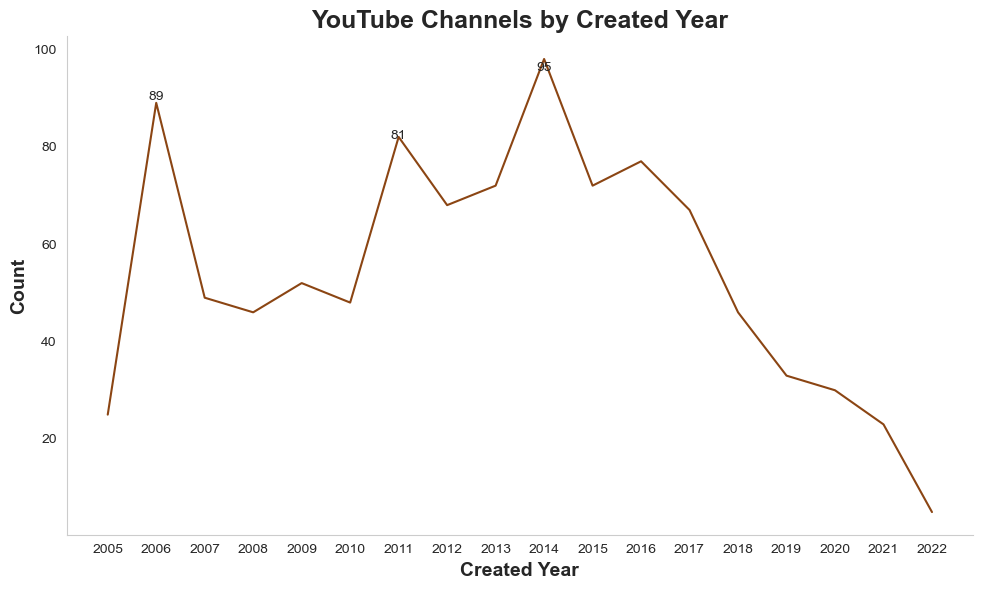

In [54]:
cnt_created_year = youtube.groupby('Created Year').size().to_frame().reset_index().rename(columns={0: 'Count'})

cnt_created_year = cnt_created_year.sort_values(by='Count', ascending=False)

sb.set_style("whitegrid", {'axes.grid': False})


plt.figure(figsize=(12, 8))

plt.figure(figsize=(10, 6))
plt.title('YouTube Channels by Created Year', fontweight='heavy', fontsize=18)
sb.lineplot(data=cnt_created_year, y='Count', x='Created Year', color='#8B4513')

label_points = [(2014, 95), (2006, 89), (2011, 81)]
for point in label_points:
    plt.text(point[0], point[1], f'{point[1]}', ha='center', va='bottom')


plt.xlabel('Created Year', fontweight='heavy', fontsize=14)
plt.ylabel('Count', fontweight='heavy', fontsize=14)
sb.despine(left=False, bottom=False)
plt.tight_layout()
plt.xticks(cnt_created_year['Created Year'])


plt.show()


In [55]:
# Group the YouTube data by 'Created Year' and 'Category', counting the number of channels (Youtubers) in each group.
top_channels_by_year = (
    youtube.groupby(['Created Year', 'Category'])  # Group data by year and category.
    ['Youtuber'].count()  # Count the number of Youtubers in each group.
    .reset_index()  # Reset index to turn grouped data back into a DataFrame.
    .sort_values(by='Youtuber', ascending=False)  # Sort the data descendingly by the count of Youtubers to find the most popular category each year.
    .drop_duplicates(subset='Created Year')  # Drop duplicates to keep only the top category for each year.
    .sort_values(by='Created Year')  # Sort the result by 'Created Year' for better chronological presentation.
    .reset_index(drop=True)  # Reset index again to clean up the DataFrame after sorting.
)

# Display the DataFrame that shows the top category of YouTube channels for each creation year.
top_channels_by_year


Created Year        Category  Youtuber
0           2005           Music         9
1           2006   Entertainment        22
2           2007           Music        17
3           2008           Music        15
4           2009           Music        24
5           2010           Music        18
6           2011           Music        23
7           2012           Music        18
8           2013   Entertainment        19
9           2014   Entertainment        20
10          2015   Entertainment        25
11          2016  People & Blogs        17
12          2017  People & Blogs        20
13          2018           Other        10
14          2019           Other        10
15          2020   Entertainment         8
16          2021  People & Blogs         7
17          2022   Entertainment         2

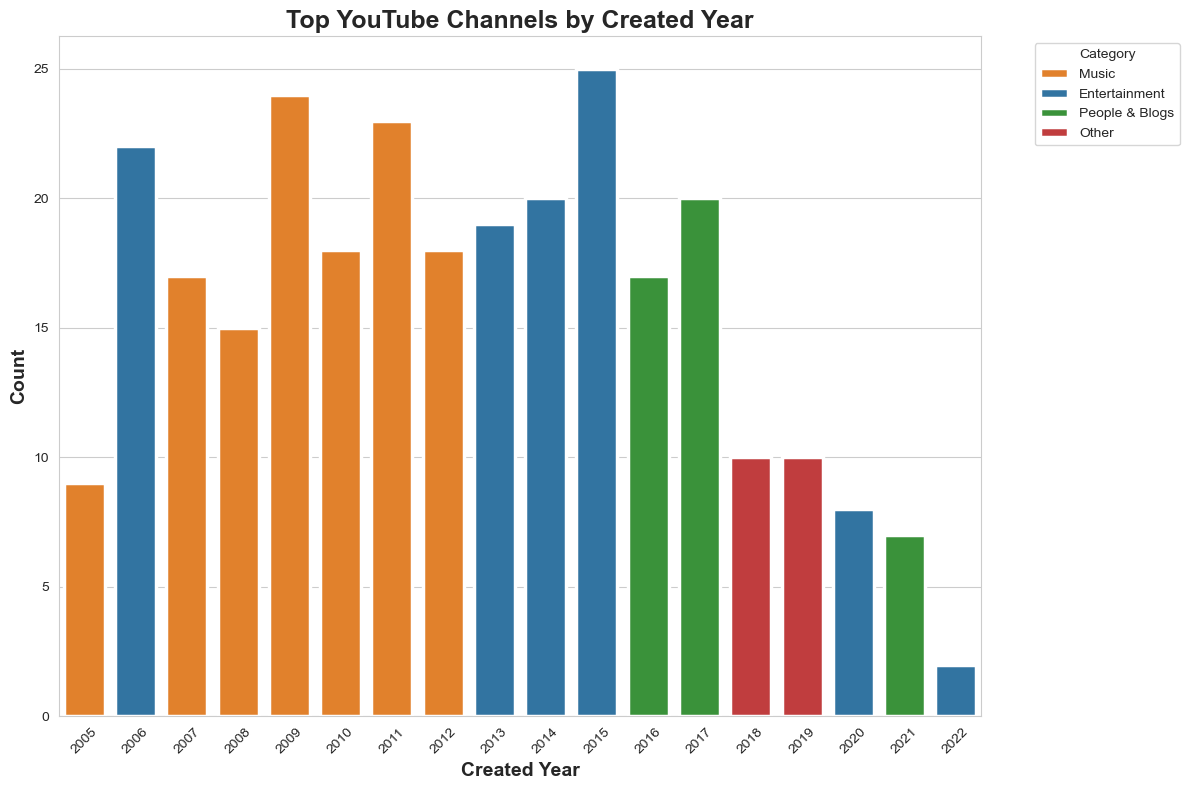

In [56]:
# Set the overall aesthetics for the plot using Seaborn.
sb.set_style("whitegrid", {'axes.grid': True})

# Define a custom palette for the categories in the plot.
custom_palette = ['#ff7f0e','#1f77b4', '#2ca02c', '#d62728', '#9467bd']

# Initialize the figure with a specific size to ensure all data is visible and not cramped.
plt.figure(figsize=(12, 8))

# Add a title to the plot with custom font settings for emphasis.
plt.title('Top YouTube Channels by Created Year', fontweight='heavy', fontsize=18)

# Create a bar plot using Seaborn to display the number of top channels by year and category.
# 'dodge=False' to overlap bars instead of side by side display, which ensures one bar per year regardless of category counts.
sb.barplot(data=top_channels_by_year, x='Created Year', y='Youtuber', hue='Category', palette=custom_palette, linewidth=2.5, dodge=False)

# Set labels for the axes with custom font weights and sizes for better readability.
plt.xlabel('Created Year', fontweight='heavy', fontsize=14)
plt.ylabel('Count', fontweight='heavy', fontsize=14)

# Rotate the x-axis labels to prevent overlap and improve legibility.
plt.xticks(rotation=45)

# Place a legend outside the plot area to avoid overlapping with the data visualization.
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to make sure all plot elements are correctly displayed.
plt.tight_layout()

# Display the final plot.
plt.show()

In [57]:
# Select the necessary columns that include category and estimated earnings range.
potentially_lucrative = youtube[['Category', 'Lowest Monthly Earnings', 'Highest Monthly Earnings']]

# Display a random sample of 5 records to get an overview of potentially lucrative data.
print("Sample of Potentially Lucrative Data:")
print(potentially_lucrative.sample(5))

# Calculate the average monthly earnings by taking the mean of the lowest and highest monthly earnings.
# This provides a more realistic estimate of what a channel might expect to earn on average.
potentially_lucrative['Average Monthly Earnings'] = (potentially_lucrative['Lowest Monthly Earnings'] + potentially_lucrative['Highest Monthly Earnings']) / 2

# Display another sample of 5 records, but this time including the newly calculated average monthly earnings.
print("\nSample of Data with Average Monthly Earnings:")
print(potentially_lucrative.sample(5))

# Group the data by 'Category' and calculate the mean of the 'Average Monthly Earnings' for each category.
# This gives a better insight into which categories are, on average, more lucrative.
category_avg_earnings = potentially_lucrative.groupby('Category')['Average Monthly Earnings'].mean().reset_index()

# Convert the average monthly earnings from dollars to thousands of dollars for easier reading and comparison.
category_avg_earnings['Average Monthly Earnings (1000$)'] = (category_avg_earnings['Average Monthly Earnings'] / 1000).astype('int')

# Sort the resulting DataFrame by average earnings in descending order to identify the top earning categories.
category_avg_earnings.sort_values(by='Average Monthly Earnings (1000$)', ascending=False, inplace=True)

# Reset the index for a clean DataFrame ready for presentation or further analysis.
category_avg_earnings.reset_index(drop=True, inplace=True)

# Display the sorted, clean DataFrame showing average monthly earnings by category.
print("\nCategory-wise Average Monthly Earnings:")
print(category_avg_earnings)

Sample of Potentially Lucrative Data:
           Category  Lowest Monthly Earnings  Highest Monthly Earnings
427   Entertainment                  27000.0                  432000.0
788          Gaming                   2600.0                   40800.0
784          Gaming                  37600.0                  602300.0
235   Entertainment                  83000.0                 1300000.0
188  People & Blogs                      0.0                       0.0

Sample of Data with Average Monthly Earnings:
             Category  Lowest Monthly Earnings  Highest Monthly Earnings  \
966    People & Blogs                   9500.0                  152700.0   
312     Entertainment                 177800.0                 2800000.0   
533     Entertainment                      0.0                       0.0   
258            Gaming                  37900.0                  606800.0   
118  Film & Animation                  28900.0                  463200.0   

     Average Monthly Earnings  


/var/folders/r2/f_69v6s931sgk1qmclph037c0000gn/T/ipykernel_69246/2572978005.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



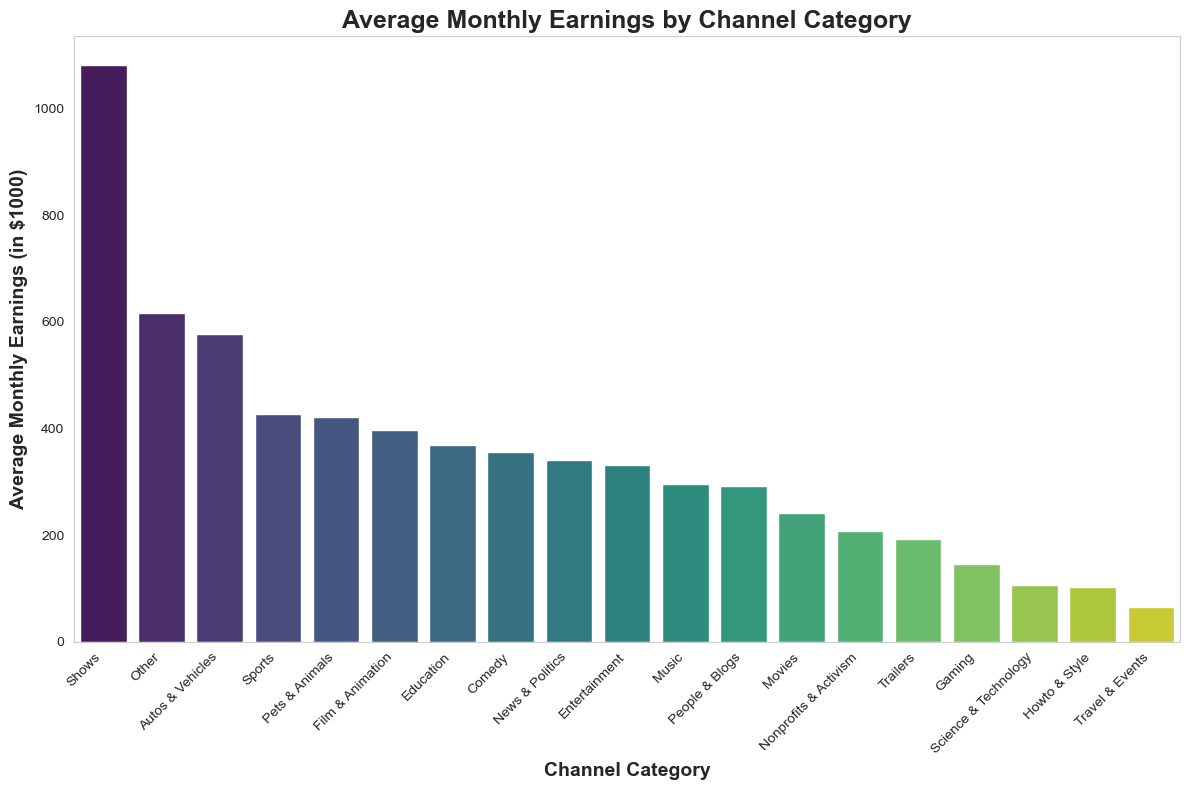

In [58]:

# Set the style and size of the plot
plt.figure(figsize=(12, 8))
sb.set_style("whitegrid", {'axes.grid': False})

# Create the bar plot
sb.barplot(data=category_avg_earnings, x='Category', y='Average Monthly Earnings (1000$)', palette='viridis')

# Add title and labels
plt.title('Average Monthly Earnings by Channel Category', fontweight='bold', fontsize=18)
plt.xlabel('Channel Category', fontweight='bold', fontsize=14)
plt.ylabel('Average Monthly Earnings (in $1000)', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [59]:
# Select necessary columns for further analysis including views and earnings details.
views_earnings = youtube[['Youtuber', 'Video Views', 'Lowest Monthly Earnings', 'Highest Monthly Earnings']]

# Calculate average monthly earnings from the lowest and highest monthly earnings.
# This average provides a more realistic estimate of monthly earnings.
views_earnings['Average Monthly Earnings'] = (views_earnings['Lowest Monthly Earnings'] + views_earnings['Highest Monthly Earnings']) / 2

# Convert the calculated average earnings from dollars to thousands of dollars for ease of analysis and display.
views_earnings['Average Monthly Earnings (1000$)'] = (views_earnings['Average Monthly Earnings'] / 1000).astype('int')

# Convert total video views from counts to billions to simplify large numbers and improve readability.
views_earnings['Video Views (billion)'] = (views_earnings['Video Views'] / 1_000_000_000).astype('int')

# Reorganize the DataFrame to include only the columns of interest: Youtuber, converted video views, and converted earnings.
views_earnings = views_earnings[['Youtuber', 'Video Views (billion)', 'Average Monthly Earnings (1000$)']]

# Display the first few rows of the updated DataFrame to get a preview of the data.
views_earnings.head()


/var/folders/r2/f_69v6s931sgk1qmclph037c0000gn/T/ipykernel_69246/1510434132.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r2/f_69v6s931sgk1qmclph037c0000gn/T/ipykernel_69246/1510434132.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r2/f_69v6s931sgk1qmclph037c0000gn/T/ipykernel_69246/1510434132.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Youtuber  Video Views (billion)  \
0                    T-Series                    228   
1                     MrBeast                     28   
2  Cocomelon - Nursery Rhymes                    164   
3                   SET India                    148   
4             Kids Diana Show                     93   

   Average Monthly Earnings (1000$)  
0                              4782  
1                              2868  
2                              4196  
3                              3877  
4                              1541

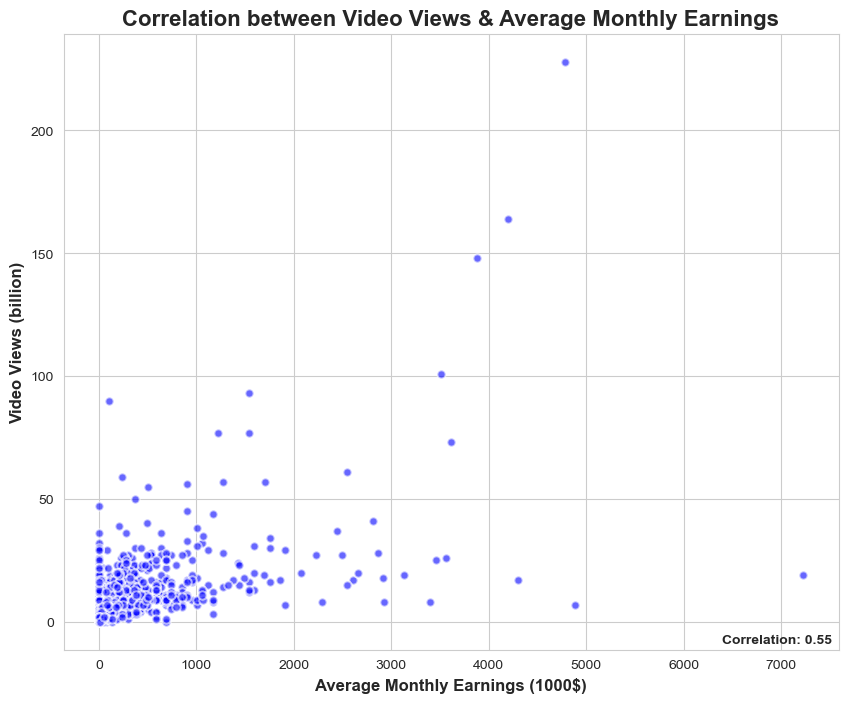

In [60]:
# Calculate the Pearson correlation coefficient between 'Average Monthly Earnings (1000$)' and 'Video Views (billion)'.
# This statistical measure will help quantify the linear relationship between monthly earnings and video views.
correlation = views_earnings['Average Monthly Earnings (1000$)'].corr(views_earnings['Video Views (billion)'])

# Set the aesthetic style of the plots using seaborn.
sb.set_style("whitegrid")

# Initialize a figure object with a specified size for the scatter plot.
plt.figure(figsize=(10, 8))

# Create a scatter plot to visualize the relationship between average monthly earnings and video views.
# The 'linewidth' parameter enhances the marker outlines for better visibility.
sb.scatterplot(data=views_earnings, x='Average Monthly Earnings (1000$)', y='Video Views (billion)', color='blue', alpha=0.6, linewidth=1.5)

# Set the title with customized font size and weight for emphasis.
plt.title('Correlation between Video Views & Average Monthly Earnings', fontsize=16, fontweight='bold')

# Label the axes with a bold font style to ensure clarity in presentation.
plt.xlabel('Average Monthly Earnings (1000$)', fontsize=12, fontweight='bold')
plt.ylabel('Video Views (billion)', fontsize=12, fontweight='bold')

# Annotate the plot with the correlation coefficient to provide immediate insight.
# The placement coordinates are set relative to the figure's axis to maintain positioning across different plot scales.
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy=(0.85, 0.01),  # Position at 85% of the x-axis and 1% of the y-axis.
             xycoords='axes fraction',  # Use the relative coordinates of the axis.
             fontsize=10, 
             weight='bold')

# Enable grid lines for better readability of plotted values.
plt.grid(True)

# Display the scatter plot.
plt.show()

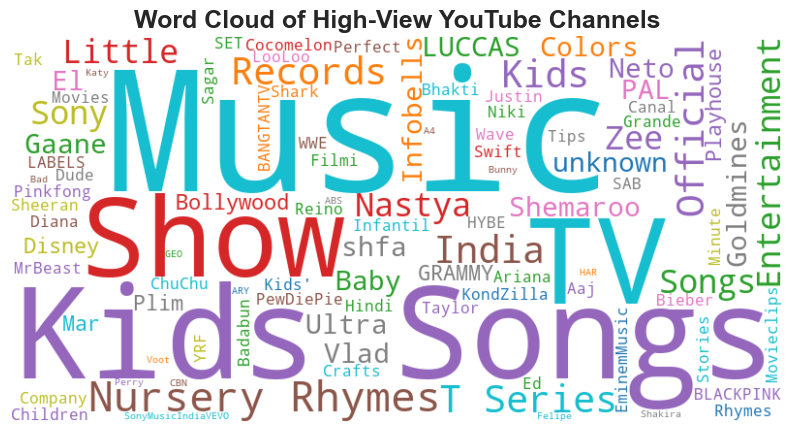

In [61]:
# Calculate the 80th percentile of video views to identify high-view channels.
percent_08 = youtube['Video Views'].quantile(0.80)

# Filter the dataset to include only those channels whose video views exceed the 80th percentile.
high_view_channels = youtube[youtube['Video Views'] > percent_08]

# Combine the names of these high-view channels into a single string to use in the word cloud.
text = ' '.join(high_view_channels['Youtuber'])

# Define a custom color palette for the word cloud to enhance visual appeal.
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a word cloud object with specific configurations:
# Set dimensions, background color, maximum number of words, and the color map.
# The 'color_func' uses a lambda function to cycle through the custom color list based on word positions.
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='tab10',
                      color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: custom_colors[position[0] % len(custom_colors)]).generate(text)

# Set up the matplotlib figure for displaying the word cloud.
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smoother appearance.
plt.axis('off')  # Hide the axes.
plt.title('Word Cloud of High-View YouTube Channels', fontsize=18, fontweight='heavy')  # Add a title with styling.

# Display the word cloud.
plt.show()

In [62]:
# Initialize a scaler object from sklearn to standardize 'Video Views' and 'Subscribers'.
# Standardization adjusts the data to have a mean of zero and a standard deviation of one, 
# which normalizes the scale of the data and is useful for composite metrics.
scaler = StandardScaler()

# Apply the scaler to the 'Video Views' and 'Subscribers' columns of the YouTube dataset.
# This will transform the data in these columns into a standardized format.
youtube[['Standardized Views', 'Standardized Subscribers']] = scaler.fit_transform(youtube[['Video Views', 'Subscribers']])

# Calculate a new composite metric, 'Composite Metric', by taking the mean of the standardized 'Video Views' and 'Subscribers'.
# This metric provides a single score representing both viewership and subscriber base in a normalized manner.
youtube['Composite Metric'] = youtube[['Standardized Views', 'Standardized Subscribers']].mean(axis=1)

# Display the first few rows of the modified DataFrame to verify the new columns and composite metric.
youtube.head()

Youtuber  Subscribers   Video Views  Uploads  \
0                    T-Series    245000000  228000000000    20082   
1                     MrBeast    166000000   28368841870      741   
2  Cocomelon - Nursery Rhymes    162000000  164000000000      966   
3                   SET India    159000000  148000000000   116536   
4             Kids Diana Show    112000000   93247040539     1111   

         Category        Country Abbreviation  Lowest Monthly Earnings  \
0           Music          India           IN                 564600.0   
1   Entertainment  United States           US                 337000.0   
2       Education  United States           US                 493800.0   
3           Shows          India           IN                 455900.0   
4  People & Blogs  United States           US                 182900.0   

   Highest Monthly Earnings  Gross Tertiary Education Enrollment (%)  \
0                 9000000.0                                     28.1   
1                 5400000.0                                     88.2   
2                 7900000.0                                     88.2   
3                 7300000.0                                     28.1   
4                 2900000.0                                     88.2   

   Unemployment Rate  Population  Urban Population  Created Year  \
0               5.36  1366417754         471031528          2006   
1              14.70   328239523         270663028          2012   
2              14.70   328239523         270663028          2006   
3               5.36  1366417754         471031528          2006   
4              14.70   328239523         270663028          2015   

   Standardized Views  Standardized Subscribers  Composite Metric  
0           15.319903                 13.506393         14.413148  
1            1.216544                  8.708179          4.962362  
2           10.798490                  8.465232          9.631861  
3            9.668137                  8.283021          8.975579  
4            5.800000                  5.428387          5.614194

In [63]:
# Create a composite score by averaging standardized 'Video Views' and 'Subscribers'
# This score integrates both views and subscribers into a single measure of channel success.
youtube['Composite Score'] = (youtube['Standardized Views'] + youtube['Standardized Subscribers']) / 2

# Calculate the 75th percentile of the composite score to use as a cutoff for categorizing success levels.
# This percentile will help identify the top 25% of channels based on the composite score.
quantile_75 = youtube['Composite Score'].quantile(0.75)

# Categorize each YouTube channel into 'Low' or 'High' success levels based on the composite score.
# Channels scoring below the 75th percentile are labeled 'Low', while those above are labeled 'High'.
youtube['Success Level'] = pd.cut(youtube['Composite Score'],
                                  bins=[-float('inf'), quantile_75, float('inf')],
                                  labels=['Low', 'High'])

# Print the count of each success level category to check distribution.
# This provides an overview of how many channels fall into each category.
print(youtube['Success Level'].value_counts())

Success Level
Low     736
High    246
Name: count, dtype: int64


In [64]:
# Drop the intermediate standardized columns and composite score before training the model
youtube = youtube.drop(columns=['Standardized Views', 'Standardized Subscribers', 'Composite Score'])
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Youtuber                                 982 non-null    object  
 1   Subscribers                              982 non-null    int64   
 2   Video Views                              982 non-null    int64   
 3   Uploads                                  982 non-null    int64   
 4   Category                                 982 non-null    object  
 5   Country                                  982 non-null    object  
 6   Abbreviation                             982 non-null    object  
 7   Lowest Monthly Earnings                  982 non-null    float64 
 8   Highest Monthly Earnings                 982 non-null    float64 
 9   Gross Tertiary Education Enrollment (%)  982 non-null    float64 
 10  Unemployment Rate                     

In [65]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


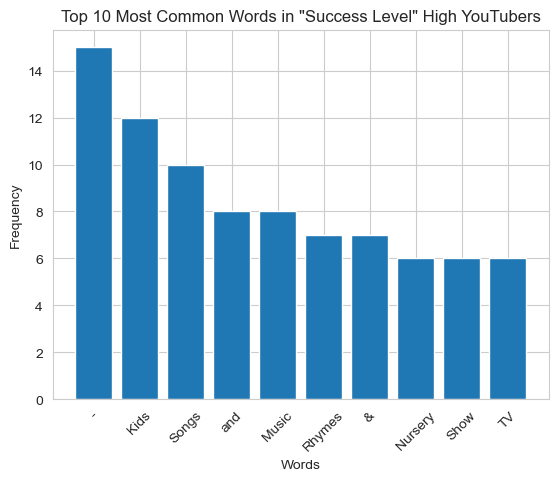

In [66]:
# Define a function to perform sentiment analysis on channel names using TextBlob.
def analyze_sentiment(text):
    """Determine the sentiment of a text and categorize it as 'Positive', 'Negative', or 'Neutral'."""
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the 'Youtuber' column in the dataset.
youtube['Sentiment'] = youtube['Youtuber'].apply(analyze_sentiment)

# Filter out channels classified under 'High' success level to focus the analysis on successful channels.
high_success_df = youtube[youtube['Success Level'] == 'High']

# Concatenate the names of high success channels to form a single text string for analysis.
high_success_text = ' '.join(high_success_df['Youtuber'])

# Tokenize the text string into individual words and count the frequency of each word.
words = high_success_text.split()
word_counts = Counter(words)

# Retrieve the 10 most common words and their frequencies.
most_common_words = word_counts.most_common(10)

# Extract words and their frequencies for plotting.
words, frequencies = zip(*most_common_words)

# Visualize the frequency of the most common words among 'High' success level channels using a bar chart.
plt.bar(words, frequencies)
plt.title('Top 10 Most Common Words in "Success Level" High YouTubers')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability.
plt.show()

In [67]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


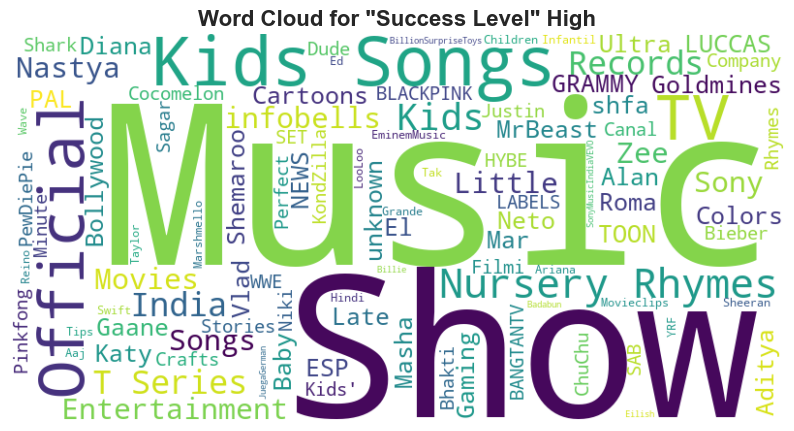

In [68]:
# Concatenate the names of YouTube channels that have a 'High' success level into a single string.
# This creates a large text corpus for the word cloud generation.
high_success_text = ' '.join(high_success_df['Youtuber'])

# Create a WordCloud object with specified attributes: background color set to white for contrast,
# width and height define the size of the word cloud image, and max_words limit the number of words to display.
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=100).generate(high_success_text)

# Set up the matplotlib figure with a defined size to ensure the word cloud is displayed properly.
plt.figure(figsize=(10, 8))

# Display the generated word cloud using matplotlib's imshow function with bilinear interpolation
# to make the display smoother.
plt.imshow(wordcloud, interpolation='bilinear')

# Add a title to the plot with a descriptive label for the visualization.
plt.title('Word Cloud for "Success Level" High', fontsize=16, fontweight='bold')

# Remove the x and y axis labels as they are unnecessary for a word cloud, which improves visual clarity.
plt.axis('off')

# Show the plot. This renders the word cloud in the output cell of a Jupyter notebook or a Python script viewer.
plt.show()

# Running Machine Learning Models

## Spliting the Data Set

In [69]:
# Define  features (X) and the target variable (y)
# Remember to exclude columns that are not predictive features or that were used to derive the target
feature_columns = [
    'Uploads', 'Category', 'Country', 'Abbreviation', 'Lowest Monthly Earnings',
    'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)',
    'Unemployment Rate', 'Population', 'Urban Population', 'Created Year'
]

# If 'Category', 'Country', and 'Abbreviation' are categorical, we will need to convert them to dummy variables
X = pd.get_dummies(youtube[feature_columns])
y = youtube['Success Level']  # Target variable

# Split dataset into training set and test set with 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the train/test splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (687, 127)
Testing set shape: (295, 127)


## Decision Tree

Accuracy of Decision Tree: 0.711864406779661
Classification Report:
              precision    recall  f1-score   support

        High       0.39      0.42      0.41        69
         Low       0.82      0.80      0.81       226

    accuracy                           0.71       295
   macro avg       0.61      0.61      0.61       295
weighted avg       0.72      0.71      0.72       295



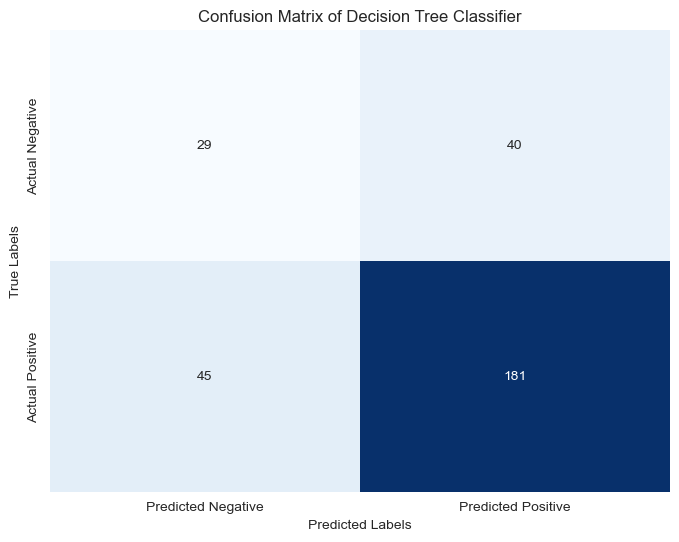

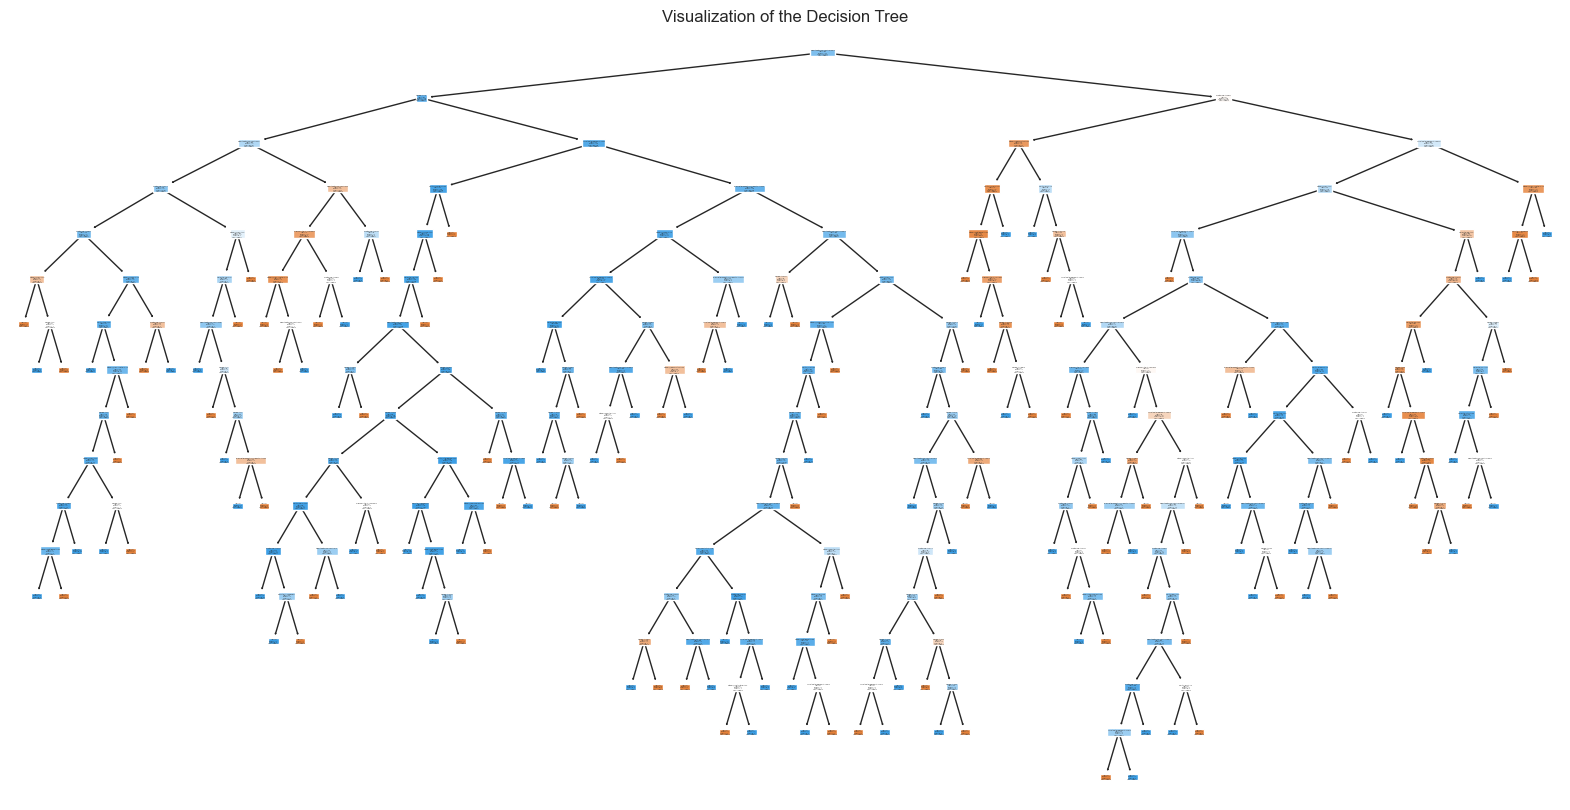

In [70]:
# Initialize the Decision Tree classifier with a specific random state for reproducibility
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = clf.predict(X_test)

# Evaluate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree:", accuracy)

# Display the classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns.tolist(), class_names=["Class 0", "Class 1"])
plt.title("Visualization of the Decision Tree")
plt.show()


## GridSearch

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validated accuracy: 0.7322014175394054
Accuracy on test set: 0.7186440677966102
              precision    recall  f1-score   support

        High       0.41      0.48      0.44        69
         Low       0.83      0.79      0.81       226

    accuracy                           0.72       295
   macro avg       0.62      0.64      0.63       295
weighted avg       0.73      0.72      0.73       295

Confusion Matrix:
[[ 33  36]
 [ 47 179]]


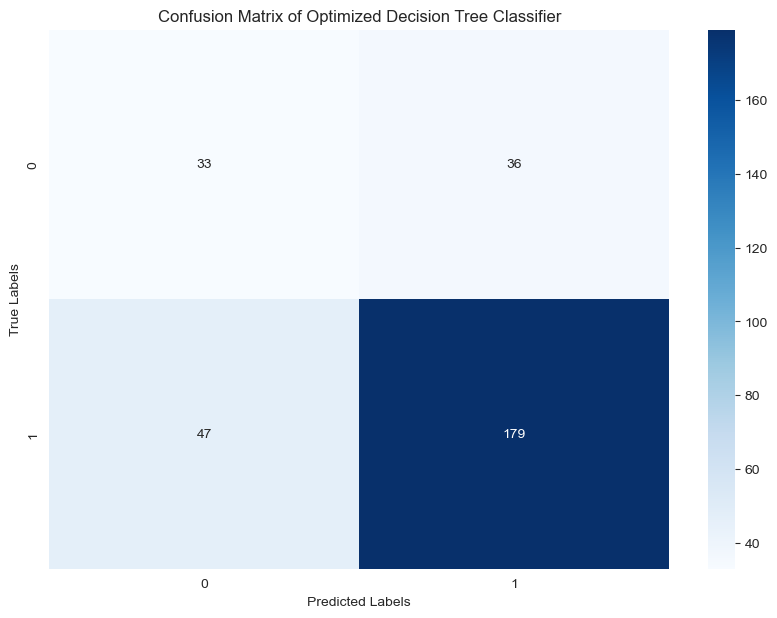

In [71]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Predict on the test set using the best found parameters
y_pred = grid_search.predict(X_test)

# Evaluate the classifier
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualizing the confusion matrix

plt.figure(figsize=(10, 7))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Optimized Decision Tree Classifier')
plt.show()

## Random Forest

Random Forest Accuracy: 0.7661016949152543
              precision    recall  f1-score   support

        High       0.50      0.35      0.41        69
         Low       0.82      0.89      0.85       226

    accuracy                           0.77       295
   macro avg       0.66      0.62      0.63       295
weighted avg       0.74      0.77      0.75       295


Confusion Matrix:
[[ 24  45]
 [ 24 202]]


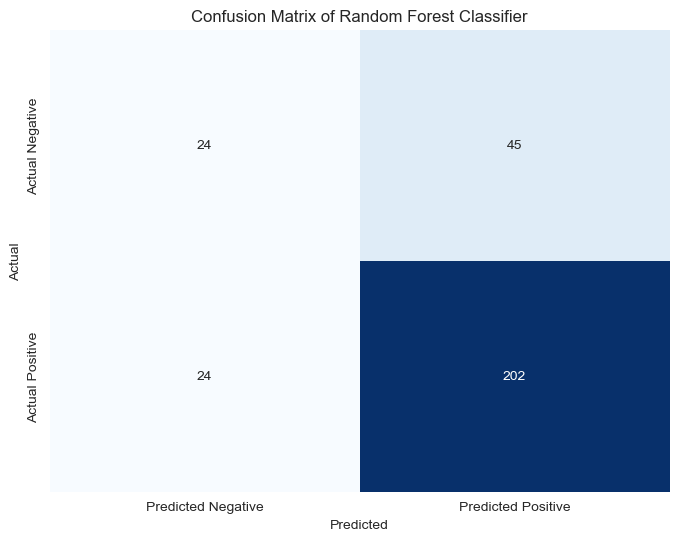

In [72]:
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_clf.fit(X_train, y_train)

# Predict the responses for the test set
y_pred_rf = rf_clf.predict(X_test)

# Print the accuracy and classification report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest Classifier")
plt.show()


## K- Nearest Neighbours classifier

KNN Accuracy: 0.6915254237288135
              precision    recall  f1-score   support

        High       0.37      0.46      0.41        69
         Low       0.82      0.76      0.79       226

    accuracy                           0.69       295
   macro avg       0.60      0.61      0.60       295
weighted avg       0.72      0.69      0.70       295


Confusion Matrix:
[[ 32  37]
 [ 54 172]]


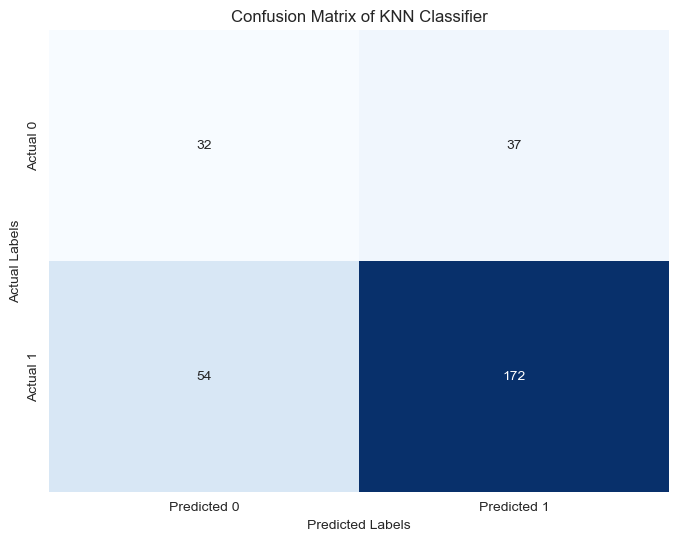

In [73]:
# Convert DataFrame to numpy array if not already (ensuring it's contiguous)
X_train_np = np.ascontiguousarray(X_train)
X_test_np = np.ascontiguousarray(X_test)
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Initialize and train the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=4)
knn_clf.fit(X_train_np, y_train_np)

# Predict on the test data
y_pred_knn = knn_clf.predict(X_test_np)

# Calculate accuracy and print classification report
print("KNN Accuracy:", accuracy_score(y_test_np, y_pred_knn))
print(classification_report(y_test_np, y_pred_knn))

# Compute and print the confusion matrix
conf_matrix_knn = confusion_matrix(y_test_np, y_pred_knn)
print("\nConfusion Matrix:")
print(conf_matrix_knn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix of KNN Classifier")
plt.show()


## Regression Model

Accuracy: 0.7728813559322034

Classification Report:
              precision    recall  f1-score   support

        High       0.53      0.30      0.39        69
         Low       0.81      0.92      0.86       226

    accuracy                           0.77       295
   macro avg       0.67      0.61      0.62       295
weighted avg       0.74      0.77      0.75       295


Confusion Matrix:
[[ 21  48]
 [ 19 207]]


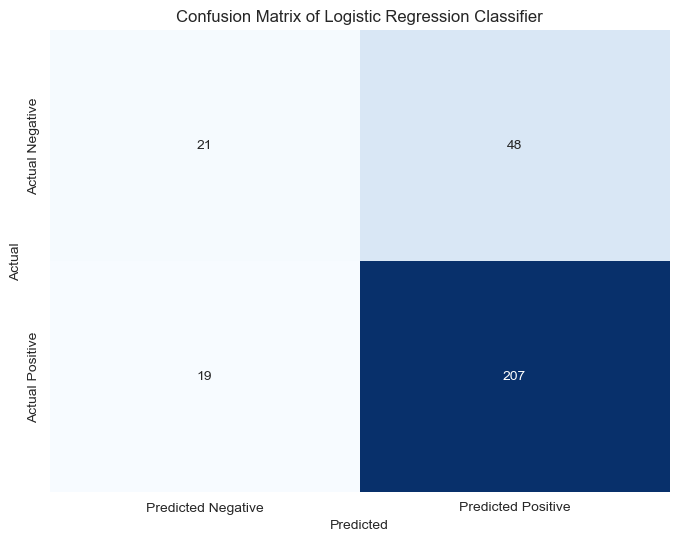

In [74]:
# Initialize the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the logistic regression model on the training data
logistic_regression_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logistic_regression_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()


## Neural Network

Neural Network Accuracy: 0.3389830508474576

Classification Report:
              precision    recall  f1-score   support

        High       0.25      0.93      0.40        69
         Low       0.88      0.16      0.27       226

    accuracy                           0.34       295
   macro avg       0.57      0.54      0.33       295
weighted avg       0.73      0.34      0.30       295


Confusion Matrix:
[[ 64   5]
 [190  36]]


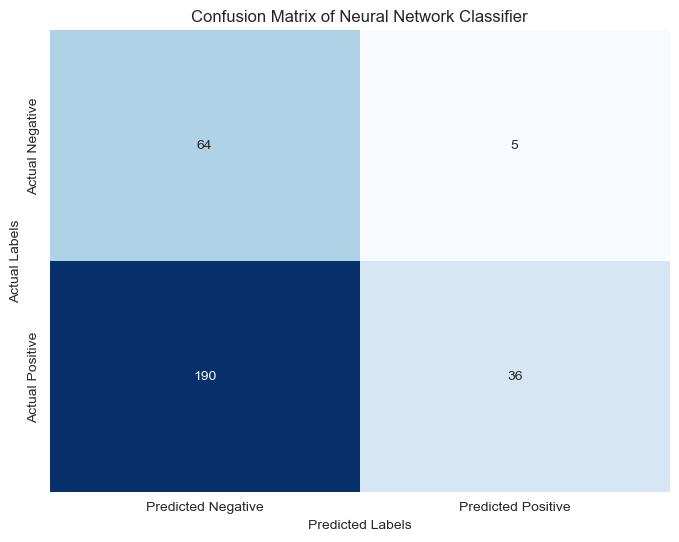

In [75]:
# Initialize the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model on the training data
nn_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_nn = nn_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# Generate and print the confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix:")
print(conf_matrix_nn)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix of Neural Network Classifier")
plt.show()

## Naive Bayes

Accuracy: 0.7762711864406779

Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.26      0.35        69
         Low       0.81      0.93      0.86       226

    accuracy                           0.78       295
   macro avg       0.68      0.60      0.61       295
weighted avg       0.74      0.78      0.75       295


Confusion Matrix:
[[ 18  51]
 [ 15 211]]


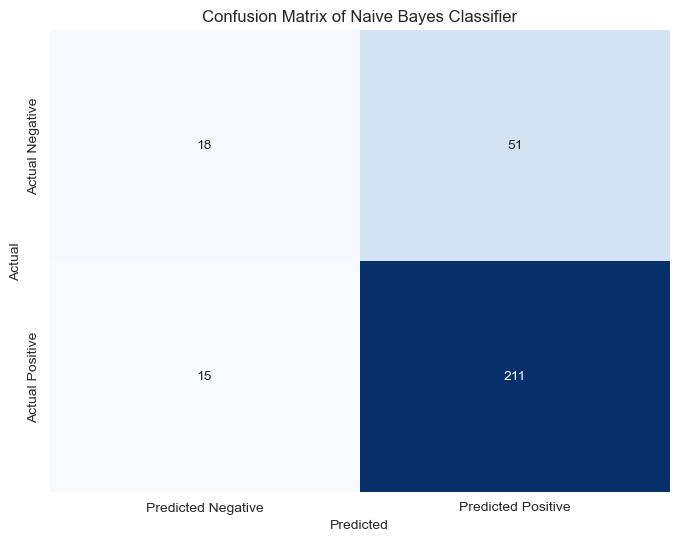

In [76]:
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the Naive Bayes model on the training data
naive_bayes_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = naive_bayes_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Naive Bayes Classifier")
plt.show()
